<a href="https://colab.research.google.com/github/zhulkhoirrifat/Air-Quality-Analysis/blob/main/seeding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library & Setup

In [102]:
!pip install faker bcrypt

In [103]:
from faker import Faker
import random
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pandas as pd
import os
import json
import bcrypt

In [104]:
fake = Faker('id_ID')

## Generate Function

### Users

In [105]:
role_distribution = {
    "Owner": 10,
    "Admin Toko": 50,
    "Kasir": 100,
    "Superadmin": 10
}

role_id_mapping = {
    "Owner": 2,
    "Admin Toko": 3,
    "Kasir": 4,
    "Superadmin": 1
}

In [106]:
def fake_phone_number(fake: Faker) -> str:
    provider_prefixes = {
        'Telkomsel': ['0811', '0812', '0813', '0821', '0822', '0823', '0852', '0853', '0851'],
        'XL': ['0817', '0818', '0819', '0859', '0877', '0878'],
        'Indosat': ['0814', '0815', '0816', '0855', '0856', '0857', '0858'],
        'Tri': ['0895', '0896', '0897', '0898', '0899'],
        'Smartfren': ['0881', '0882', '0883', '0884', '0885', '0886', '0887', '0888', '0889']
    }

    provider = random.choice(list(provider_prefixes.keys()))
    prefix = random.choice(provider_prefixes[provider])

    random_digits = fake.numerify(text='#######')

    return f'+62{prefix[1:]}{random_digits}'

In [107]:
def generate_users(role_distribution, role_id_mapping):
    """ Membuat data dummy users
    Args:
        role_distribuiton(dict): Jumlah distribusi role pada user.
        role_id_mapping(dict): Id role pada tabel roles
    Return:
        users_data(list): Hasil generate data dummy users

    """
    users_data = []
    user_id = 1

    for role, jumlah in role_distribution.items():
        for _ in range(jumlah):

            name_male = fake.first_name_male() + " " + fake.last_name_male()
            name_female = fake.first_name_female() + " " + fake.last_name_female()

            email = fake.email()
            phone_number = fake_phone_number(fake)
            plain_password = fake.password()
            password = bcrypt.hashpw(plain_password.encode('utf-8'), bcrypt.gensalt(10)).decode('utf-8')
            gender = random.choice(['MALE', 'FEMALE'])
            name = name_male if gender == 'MALE' else name_female
            image_url = fake.image_url()
            id_card = fake.image_url()
            npwp = fake.image_url()
            role_id = role_id_mapping[role]

            users_data.append({
                'userId': user_id,
                'name': name,
                'email': email,
                'password': password,
                'imageUrl': image_url,
                'phoneNumber': phone_number,
                'isEmailVerified': 1,
                'roleId': role_id
            })
            user_id += 1
    return users_data

In [108]:
users_data = generate_users(role_distribution, role_id_mapping)
users_df = pd.DataFrame(users_data)
users_df.to_csv('users.csv', index=False)

In [109]:
users_df

,userId,name,email,password,imageUrl,phoneNumber,isEmailVerified,roleId
0,1,Najam Putra,tampubolonrini@example.net,$2b$10$VlsFmJ2qJhyIh43JpcZEyOtmBDoxsUP1zRaJ7Ne...,https://placekitten.com/648/465,+628828769778,1,2
1,2,Saiful Siregar,igunawan@example.com,$2b$10$UDfgxEbezR1dC4H1IEq/ZOFdk0lM1O2YjeG3CX6...,https://picsum.photos/884/35,+628565116703,1,2
2,3,Siti Melani,lsiregar@example.com,$2b$10$0GIzhwSWJOB4xS6WY5NLju3GEii9FN6nGB94Uzr...,https://dummyimage.com/782x16,+628884846523,1,2
3,4,Yuni Padmasari,siregarkalim@example.net,$2b$10$yqMG8MRicWiMIWSUVXQ0qey2PS8OK9yBCYwAUDQ...,https://picsum.photos/403/961,+628957305493,1,2
4,5,Artanto Rajata,uyainahpanca@example.org,$2b$10$Cs30OlavT642uMfLmPj.0O5kJD1as4ssNo6fsaD...,https://placekitten.com/799/122,+628182082791,1,2
...,...,...,...,...,...,...,...,...
165,166,Puji Oktaviani,anggrainizizi@example.com,$2b$10$yxJRigxuFpAOqZaPd8.G0epkDm1vNiGH.OsXZ.v...,https://picsum.photos/577/342,+628558564748,1,1
166,167,Opung Rajata,dalimin12@example.com,$2b$10$w8jvXnfndW84iVYDeLTL0eb5ATLb.Vkw3ShFpjW...,https://picsum.photos/189/97,+628159716773,1,1
167,168,Rahayu Lailasari,thidayat@example.net,$2b$10$RGA5vf6hy7Wt9err6sAVv.zpu3xxSrKdkumHknJ...,https://placekitten.com/938/668,+628150112324,1,1
168,169,Pangeran Hidayat,harto71@example.net,$2b$10$tWzm24j01oHoQmY1TEcTge3NxZpfa6IbjsmTSds...,https://placekitten.com/49/600,+628859050794,1,1


### Tenants

In [110]:
province_id = 32
city_id = 71

districts = {
    "5579": "BALIKPAPAN SELATAN",
    "5753": "BALIKPAPAN KOTA",
    "5783": "BALIKPAPAN TIMUR",
    "5693": "BALIKPAPAN UTARA",
    "5507": "BALIKPAPAN TENGAH",
    "5689": "BALIKPAPAN BARAT"
}

villages = {
    "5579": [
        {"id": "60411", "name": "GUNUNG BAHAGIA"},
        {"id": "62966", "name": "SEPINGGAN"},
        {"id": "60197", "name": "DAMAI BARU"},
        {"id": "60196", "name": "DAMAI BAHAGIA"},
        {"id": "59139", "name": "SUNGAI NANGKA"},
        {"id": "62968", "name": "SEPINGGAN RAYA"},
        {"id": "62967", "name": "SEPINGGAN BARU"}
    ],
    "5753": [
        {"id": "62384", "name": "PRAPATAN"},
        {"id": "63153", "name": "TELAGA SARI"},
        {"id": "60900", "name": "KLANDASAN ULU"},
        {"id": "60899", "name": "KLANDASAN ILIR"},
        {"id": "60195", "name": "DAMAI"}
    ],
    "5783": [
        {"id": "61365", "name": "MANGGAR"},
        {"id": "61366", "name": "MANGGAR BARU"},
        {"id": "61019", "name": "LEMARU"},
        {"id": "63284", "name": "TERITIP"}
    ],
    "5693": [
        {"id": "61718", "name": "MUARA RAPAK"},
        {"id": "60412", "name": "GUNUNG SAMARINDA"},
        {"id": "59798", "name": "BATU AMPAR"},
        {"id": "60710", "name": "KARANG JOANG"},
        {"id": "60413", "name": "GUNUNG SAMARINDA BARU"},
        {"id": "60379", "name": "GRAHA INDAH"}
    ],
    "5507": [
        {"id": "60414", "name": "GUNUNG SARI ILIR"},
        {"id": "60415", "name": "GUNUNG SARI ULU"},
        {"id": "61482", "name": "MEKAR SARI"},
        {"id": "60714", "name": "KARANG REJO"},
        {"id": "58912", "name": "SUMBER REJO"},
        {"id": "60708", "name": "KARANG JATI"}
    ],
    "5689": [
        {"id": "59771", "name": "BARU TENGAH"},
        {"id": "61407", "name": "MARGA SARI"},
        {"id": "59769", "name": "BARU ILIR"},
        {"id": "61411", "name": "MARGO MULYO"},
        {"id": "59772", "name": "BARU ULU"},
        {"id": "60731", "name": "KARIANGAU"}
    ]
}

In [111]:
def generate_tenants(users_data):
    """ Membuat data dummy tenants.
    Args:
        users_data(list): Data users yang telah digenerate.

    Return:
        tenants_data(list): Hasil generate data dummy tenants.
    """
    tenants_data = []
    tenant_id = 1
    global province_id, city_id

    for i, user in enumerate(users_data):
        if user['roleId'] == 2:
            user_id = user['userId']
            name = fake.company()
            npwp_company_number = random.randint(100000000000000, 999999999999999)
            npwp_company_image= fake.image_url()
            province_id = province_id
            city_id = city_id
            district_id = random.choice(list(districts.keys()))
            village = random.choice(villages[district_id])
            village_id = village['id']

            tenants_data.append({
                'tenantId': tenant_id,
                'userId': user_id,
                'name': name,
                'npwpCompanyNumber': npwp_company_number,
                'npwpCompanyImage': npwp_company_image,
                'provinceId': province_id,
                'cityId': city_id,
                'districtId': district_id,
                'villageId': village_id,
            })
            tenant_id += 1

    return tenants_data

In [112]:
tenants_data = generate_tenants(users_data)
tenants_df = pd.DataFrame(tenants_data)
tenants_df.to_csv('tenants.csv', index=False)

In [113]:
tenants_df

,tenantId,userId,name,npwpCompanyNumber,npwpCompanyImage,provinceId,cityId,districtId,villageId
0,1,1,Perum Lazuardi Uyainah Tbk,117542137607156,https://picsum.photos/453/443,32,71,5689,59772
1,2,2,PT Marpaung Namaga (Persero) Tbk,536931982449492,https://placekitten.com/921/237,32,71,5579,60196
2,3,3,PD Dongoran (Persero) Tbk,295722565098178,https://dummyimage.com/143x308,32,71,5507,60708
3,4,4,UD Usamah Prastuti,499718639825378,https://picsum.photos/605/38,32,71,5693,60710
4,5,5,Perum Laksmiwati Kuswoyo,695341812629686,https://placekitten.com/585/176,32,71,5689,61411
5,6,6,Perum Kusumo,828827959972363,https://picsum.photos/462/309,32,71,5693,60413
6,7,7,Perum Hutapea,524998841940994,https://picsum.photos/695/364,32,71,5579,62968
7,8,8,Perum Permata Prasasta,477428036519836,https://placekitten.com/253/378,32,71,5689,61407
8,9,9,Perum Wibisono,433654021316376,https://dummyimage.com/354x633,32,71,5693,60412
9,10,10,CV Pradana Thamrin (Persero) Tbk,828775018249137,https://dummyimage.com/184x506,32,71,5579,59139


### Stores

In [114]:
store_types_dict = {
    1: 'Makanan & Minuman',
    2: 'Fashion & Aksesoris',
    3: 'Perawatan Diri & Kecantikan',
    4: 'Elektronik, Gadget & Alat Musik',
    5: 'Perlengkapan Rumah Tangga & Dekorasi',
    6: 'Otomotif & Suku Cadang',
    7: 'Pertanian, Peternakan & Toko Hewan',
    8: 'Mainan, Hobi & Peralatan Outdoor',
    9: 'Peralatan Bayi & Anak',
    10: 'Minimarket & Kelontong',
    11: 'Produk Kesehatan',
    12: 'Pulsa & Layanan'
}

store_types_list = [{'storeTypeId': k, 'name': v} for k, v in store_types_dict.items()]

In [115]:
def generate_stores(tenants_data, store_types_dict, total_stores=30):
    """ Membuat data dummy stores dengan distribusi acak.
    Args:
        tenants_data (list): Data tenant yang telah digenerate.
        store_types_dict (dict): Dictionary tipe dari toko yang akan di-generate.
        total_stores (int): Total toko yang akan digenerate.

    Return:
        stores_data (list): Hasil generate data dummy stores.
    """
    stores_data = []
    store_id = 1
    store_names = {}
    owner_ids = [tenant["userId"] for tenant in tenants_data]

    def generate_unique_store_name(base_name):
        if base_name not in store_names:
            store_names[base_name] = 1
            return base_name
        else:
            store_names[base_name] += 1
            return f'{base_name} Cabang {store_names[base_name]}'

    # Tentukan jumlah toko yang dimiliki setiap tenant secara acak
    store_distribution = {owner_id: random.randint(1, 5) for owner_id in owner_ids}  # Bisa memiliki 1 hingga 5 toko

    for owner_id, num_stores in store_distribution.items():
        for _ in range(num_stores):
            if len(stores_data) >= total_stores:
                break  # Berhenti jika jumlah toko sudah cukup

            store_type_id, store_type_name = random.choice(list(store_types_dict.items()))
            district_id = random.choice(list(districts.keys()))
            village = random.choice(villages[district_id])
            village_id = village['id']
            owner_name = next(user['name'] for user in users_data if user['userId'] == owner_id)
            base_name = f"{store_type_name} {owner_name.split()[1]}"
            name = generate_unique_store_name(base_name)

            stores_data.append({
                "storeId": store_id,
                "StoreCode": f'STR-{random.randint(100000000000,999999999999)}',
                "tenantId": owner_id,
                "name": name,
                "image": fake.image_url(),
                "address": fake.address(),
                "provinceId": province_id,
                "cityId": city_id,
                "districtId": district_id,
                "villageId": village_id,
                "storeTypeId": store_type_id,
                "postalCode": fake.postcode(),
                "description": fake.text(),
                "phoneNumber": fake.phone_number(),
                "logo": fake.image_url(),
                "npwpCompany": fake.image_url(),
                "permitCertificate": fake.image_url(),
                "status": 'ACTIVE'
            })
            store_id += 1

    return stores_data

In [116]:
stores_data = generate_stores(tenants_data, store_types_dict)
stores_df = pd.DataFrame(stores_data)
stores_df.to_csv('stores.csv', index=False)

In [117]:
stores_df

,storeId,StoreCode,tenantId,name,image,address,provinceId,cityId,districtId,villageId,storeTypeId,postalCode,description,phoneNumber,logo,npwpCompany,permitCertificate,status
0,1,STR-254671389071,1,"Elektronik, Gadget & Alat Musik Putra",https://dummyimage.com/856x225,"Jalan Peta No. 3\nPontianak, Jawa Tengah 16014",32,71,5507,58912,4,45322,Culpa perspiciatis error consequatur pariatur....,+62-635-352-9757,https://dummyimage.com/921x293,https://dummyimage.com/864x351,https://picsum.photos/601/197,ACTIVE
1,2,STR-968214848988,2,"Elektronik, Gadget & Alat Musik Siregar",https://placekitten.com/847/470,"Gg. H.J Maemunah No. 63\nCimahi, BE 56407",32,71,5507,58912,4,95556,Nostrum suscipit eligendi quaerat hic.\nSed re...,+62-0597-539-1962,https://dummyimage.com/490x286,https://dummyimage.com/978x539,https://dummyimage.com/979x437,ACTIVE
2,3,STR-706174213432,2,"Pertanian, Peternakan & Toko Hewan Siregar",https://picsum.photos/229/743,"Gang Pasteur No. 3\nPalopo, BA 44886",32,71,5693,60412,7,88927,Ex tenetur non inventore.\nPerspiciatis deseru...,(0356) 845 9270,https://picsum.photos/837/947,https://placekitten.com/76/147,https://picsum.photos/193/772,ACTIVE
3,4,STR-606997083457,2,Produk Kesehatan Siregar,https://picsum.photos/267/445,"Gg. Gardujati No. 7\nLubuklinggau, SR 02451",32,71,5689,61407,11,78453,Pariatur reprehenderit non accusamus. Quaerat ...,+62-0809-755-4616,https://dummyimage.com/685x694,https://placekitten.com/643/731,https://placekitten.com/992/947,ACTIVE
4,5,STR-939441123218,3,"Pertanian, Peternakan & Toko Hewan Melani",https://picsum.photos/714/910,"Jalan Moch. Ramdan No. 2\nPurwokerto, Maluku 0...",32,71,5783,61019,7,86964,Odit neque voluptates magni tenetur voluptates...,+62 (910) 370-4916,https://placekitten.com/44/284,https://placekitten.com/640/312,https://placekitten.com/706/50,ACTIVE
5,6,STR-858297653236,3,"Pertanian, Peternakan & Toko Hewan Melani Caba...",https://picsum.photos/372/289,"Jalan Pasirkoja No. 7\nTanjungbalai, Jawa Timu...",32,71,5507,60714,7,36515,Reprehenderit earum minima nobis id. Fugiat sa...,+62 (28) 540-3232,https://dummyimage.com/635x66,https://picsum.photos/549/250,https://picsum.photos/267/482,ACTIVE
6,7,STR-489583933462,3,Peralatan Bayi & Anak Melani,https://picsum.photos/86/670,"Gang Otto Iskandardinata No. 8\nDumai, Riau 08961",32,71,5753,60195,9,74411,Iste officiis molestiae eius ex sint rem. Dolo...,+62 (027) 088-2893,https://picsum.photos/439/747,https://dummyimage.com/189x824,https://picsum.photos/958/684,ACTIVE
7,8,STR-747270916909,3,Pulsa & Layanan Melani,https://placekitten.com/604/877,"Jalan Dipatiukur No. 2\nBukittinggi, MA 41064",32,71,5693,59798,12,10284,Veritatis quibusdam necessitatibus iusto id. Q...,+62 (043) 920 5255,https://dummyimage.com/476x991,https://picsum.photos/498/520,https://picsum.photos/62/724,ACTIVE
8,9,STR-623580478682,3,Pulsa & Layanan Melani Cabang 2,https://picsum.photos/734/323,"Gg. Peta No. 230\nBontang, JA 92668",32,71,5579,62967,12,84354,Consequatur deleniti porro nulla. Amet recusan...,+62 (84) 897 5190,https://placekitten.com/523/779,https://placekitten.com/760/736,https://picsum.photos/496/454,ACTIVE
9,10,STR-141727947599,4,Minimarket & Kelontong Padmasari,https://dummyimage.com/144x973,"Gang Siliwangi No. 113\nMagelang, JA 09360",32,71,5579,62967,10,46406,Tempora repudiandae nisi perspiciatis libero v...,+62 (94) 324 3108,https://dummyimage.com/719x87,https://picsum.photos/492/411,https://placekitten.com/407/370,ACTIVE


In [118]:
check_pemilik = stores_df['tenantId'].value_counts()
print(check_pemilik)

tenantId
3    5
7    5
4    5
6    5
8    4
2    3
1    1
5    1
9    1
Name: count, dtype: int64


In [119]:
jumlah_toko = stores_df[stores_df['tenantId'] == 3]

jumlah_toko

,storeId,StoreCode,tenantId,name,image,address,provinceId,cityId,districtId,villageId,storeTypeId,postalCode,description,phoneNumber,logo,npwpCompany,permitCertificate,status
4,5,STR-939441123218,3,"Pertanian, Peternakan & Toko Hewan Melani",https://picsum.photos/714/910,"Jalan Moch. Ramdan No. 2\nPurwokerto, Maluku 0...",32,71,5783,61019,7,86964,Odit neque voluptates magni tenetur voluptates...,+62 (910) 370-4916,https://placekitten.com/44/284,https://placekitten.com/640/312,https://placekitten.com/706/50,ACTIVE
5,6,STR-858297653236,3,"Pertanian, Peternakan & Toko Hewan Melani Caba...",https://picsum.photos/372/289,"Jalan Pasirkoja No. 7\nTanjungbalai, Jawa Timu...",32,71,5507,60714,7,36515,Reprehenderit earum minima nobis id. Fugiat sa...,+62 (28) 540-3232,https://dummyimage.com/635x66,https://picsum.photos/549/250,https://picsum.photos/267/482,ACTIVE
6,7,STR-489583933462,3,Peralatan Bayi & Anak Melani,https://picsum.photos/86/670,"Gang Otto Iskandardinata No. 8\nDumai, Riau 08961",32,71,5753,60195,9,74411,Iste officiis molestiae eius ex sint rem. Dolo...,+62 (027) 088-2893,https://picsum.photos/439/747,https://dummyimage.com/189x824,https://picsum.photos/958/684,ACTIVE
7,8,STR-747270916909,3,Pulsa & Layanan Melani,https://placekitten.com/604/877,"Jalan Dipatiukur No. 2\nBukittinggi, MA 41064",32,71,5693,59798,12,10284,Veritatis quibusdam necessitatibus iusto id. Q...,+62 (043) 920 5255,https://dummyimage.com/476x991,https://picsum.photos/498/520,https://picsum.photos/62/724,ACTIVE
8,9,STR-623580478682,3,Pulsa & Layanan Melani Cabang 2,https://picsum.photos/734/323,"Gg. Peta No. 230\nBontang, JA 92668",32,71,5579,62967,12,84354,Consequatur deleniti porro nulla. Amet recusan...,+62 (84) 897 5190,https://placekitten.com/523/779,https://placekitten.com/760/736,https://picsum.photos/496/454,ACTIVE


In [120]:
check_store = stores_df[stores_df['storeId'] == 21]
check_store

,storeId,StoreCode,tenantId,name,image,address,provinceId,cityId,districtId,villageId,storeTypeId,postalCode,description,phoneNumber,logo,npwpCompany,permitCertificate,status
20,21,STR-458746218782,7,Peralatan Bayi & Anak Yulianti,https://placekitten.com/670/874,"Gg. H.J Maemunah No. 0\nGorontalo, NB 92321",32,71,5507,60708,9,53957,Porro nam quaerat commodi hic dolor eveniet. D...,(081) 271-3957,https://dummyimage.com/851x206,https://dummyimage.com/753x242,https://placekitten.com/132/335,ACTIVE


### Store Users

In [121]:
def generate_store_users(users_data, stores_data):
    """ Membuat data dummy store_users.
    Args:
        users_data(list): Data users yang telah digenerate.
        stores_data(list): Data stores yang telah digenerate.

    Return:
        store_users_data(list): Hasil generate data dummy store_users.
    """

    store_users_data = []
    store_user_id = 1

    for user in users_data:
        if user['roleId'] in [3, 4]:
            store_id = random.choice(stores_data)['storeId']
            store_users_data.append({
                'storeUserId': store_user_id,
                'userId': user['userId'],
                'storeId': store_id
            })
            store_user_id += 1

        elif user["roleId"] == 2:
            for store in stores_data:
                if store["tenantId"] == user["userId"]:
                    store_users_data.append({
                        "storeUserId": store_user_id,
                        "userId": user["userId"],
                        "storeId": store["storeId"]
                    })
                    store_user_id += 1
    return store_users_data

In [122]:
store_users_data = generate_store_users(users_data, stores_data)
store_users_df = pd.DataFrame(store_users_data)
store_users_df.to_csv('store_users.csv', index=False)

In [123]:
store_users_df

,storeUserId,userId,storeId
0,1,1,1
1,2,2,2
2,3,2,3
3,4,2,4
4,5,3,5
...,...,...,...
175,176,156,6
176,177,157,6
177,178,158,7
178,179,159,4


In [124]:
store_users_df['storeId'].value_counts()

,count
storeId,
11,12
24,10
28,9
16,8
26,8
1,8
14,7
12,7
7,7


In [125]:
check_toko = store_users_df[store_users_df['userId'] == 73]
check_toko

,storeUserId,userId,storeId
92,93,73,24


In [126]:
check_toko = store_users_df[store_users_df['storeId'] == 21]
check_toko

,storeUserId,userId,storeId
20,21,7,21
45,46,26,21
108,109,89,21
133,134,114,21
149,150,130,21


In [127]:
check_karyawan = users_df[users_df['userId'] == 73]
check_karyawan

,userId,name,email,password,imageUrl,phoneNumber,isEmailVerified,roleId
72,73,Zamira Nurdiyanti,mayasaricindy@example.org,$2b$10$lj9eALzyjB5KIGlHwx5wBeZWVZMoIu9bJeNXbVl...,https://dummyimage.com/914x885,+628882707427,1,4


### Shifts

In [128]:
# Hari dalam seminggu
shift_days = ['SUNDAY', 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY']

# Rentang waktu 6 bulan
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 3, 10)

In [129]:
def get_week_starts(start, end):
    week_starts = []
    current = start
    while current < end:
        week_starts.append(current)
        current += timedelta(days=7)
    return week_starts

In [130]:
def get_store_operation_hours(store_type_id):
    # Minimarket dan Produk Kesehatan bisa 8, 12, atau 24 jam
    if store_type_id in [10, 11]:  # Minimarket & Produk Kesehatan
        # Distribusi: 60% 12 jam, 30% 8 jam, 10% 24 jam
        rand = random.random()
        if rand < 0.6:
            return 12  # Mayoritas 12 jam
        elif rand < 0.9:
            return 8   # 30% 8 jam
        else:
            return 24  # 10% 24 jam
    else:
        # Toko lain hanya 8 atau 12 jam (70% 8 jam, 30% 12 jam)
        return 8 if random.random() < 0.7 else 12

In [131]:
# Definisikan shift berdasarkan jam operasional toko
def get_shift_times(operation_hours):
    if operation_hours == 24:
        return [(7, 15), (15, 23), (23, 7)]  # 3 shift untuk 24 jam
    elif operation_hours == 12:
        return [(8, 16), (14, 22)]  # 2 shift untuk 12 jam
    else:  # 8 jam
        return [(9, 17)]  # 1 shift untuk 8 jam

In [132]:
def generate_shifts(store_users_data, users_data, stores_data):
    shift_data = []
    shift_id = 1
    week_starts = get_week_starts(start_date, end_date)

    # Mapping user_id ke role_id dan store_id ke store_type_id untuk efisiensi
    user_role_map = {user["userId"]: user["roleId"] for user in users_data}
    store_type_map = {store["storeId"]: store["storeTypeId"] for store in stores_data}

    # Tentukan jam operasional untuk setiap toko
    store_operation_hours = {store["storeId"]: get_store_operation_hours(store["storeTypeId"]) for store in stores_data}

    for store_user in store_users_data:
        user_id = store_user["userId"]
        role_id = user_role_map.get(user_id)

        # Hanya generate shift untuk kasir (role_id = 4)
        if role_id != 4:
            continue

        store_id = store_user["storeId"]
        operation_hours = store_operation_hours[store_id]
        shift_times = get_shift_times(operation_hours)
        user_store_id = store_user["storeUserId"]

        # Untuk setiap minggu dalam 6 bulan
        for week_start in week_starts:
            # Pilih 1 hari libur secara acak
            off_day = random.choice(shift_days)
            work_days = [day for day in shift_days if day != off_day]

            for work_day in work_days:
                days_ahead = shift_days.index(work_day) - week_start.weekday()
                if days_ahead < 0:
                    days_ahead += 7

                shift_date = week_start + timedelta(days=days_ahead)
                if shift_date > end_date:
                    break

                # Pilih shift acak dari shift_times yang sesuai dengan jam operasional
                start_hour, end_hour = random.choice(shift_times)
                shift_start = datetime.combine(shift_date, datetime.min.time()) + timedelta(hours=start_hour)
                shift_end = shift_start + timedelta(hours=(end_hour - start_hour))

                if end_hour < start_hour:  # Shift malam (khusus 24 jam)
                    shift_end += timedelta(days=1)

                shift_data.append({
                    "shiftId": shift_id,
                    "shiftStart": shift_start,
                    "shiftEnd": shift_end,
                    "day": work_day,
                    "storeUserId": user_store_id
                })
                shift_id += 1

    return shift_data

In [133]:
shifts_data = generate_shifts(store_users_data, users_data, stores_data)
shifts_df = pd.DataFrame(shifts_data)
shifts_df.to_csv('shifts.csv', index=False)

In [134]:
shifts_df

,shiftId,shiftStart,shiftEnd,day,storeUserId
0,1,2024-01-01 09:00:00,2024-01-01 17:00:00,SUNDAY,81
1,2,2024-01-03 09:00:00,2024-01-03 17:00:00,TUESDAY,81
2,3,2024-01-04 09:00:00,2024-01-04 17:00:00,WEDNESDAY,81
3,4,2024-01-05 09:00:00,2024-01-05 17:00:00,THURSDAY,81
4,5,2024-01-06 09:00:00,2024-01-06 17:00:00,FRIDAY,81
...,...,...,...,...,...
37195,37196,2025-03-05 09:00:00,2025-03-05 17:00:00,TUESDAY,180
37196,37197,2025-03-06 09:00:00,2025-03-06 17:00:00,WEDNESDAY,180
37197,37198,2025-03-07 09:00:00,2025-03-07 17:00:00,THURSDAY,180
37198,37199,2025-03-08 09:00:00,2025-03-08 17:00:00,FRIDAY,180


In [135]:
shifts_df[shifts_df['storeUserId'] == 93].value_counts().sum()

np.int64(372)

In [136]:
shifts_df[shifts_df['storeUserId'] == 93]

,shiftId,shiftStart,shiftEnd,day,storeUserId
4464,4465,2024-01-01 09:00:00,2024-01-01 17:00:00,SUNDAY,93
4465,4466,2024-01-02 09:00:00,2024-01-02 17:00:00,MONDAY,93
4466,4467,2024-01-03 09:00:00,2024-01-03 17:00:00,TUESDAY,93
4467,4468,2024-01-04 09:00:00,2024-01-04 17:00:00,WEDNESDAY,93
4468,4469,2024-01-05 09:00:00,2024-01-05 17:00:00,THURSDAY,93
...,...,...,...,...,...
4831,4832,2025-03-04 09:00:00,2025-03-04 17:00:00,MONDAY,93
4832,4833,2025-03-05 09:00:00,2025-03-05 17:00:00,TUESDAY,93
4833,4834,2025-03-06 09:00:00,2025-03-06 17:00:00,WEDNESDAY,93
4834,4835,2025-03-08 09:00:00,2025-03-08 17:00:00,FRIDAY,93


In [137]:
shifts_df.value_counts(shifts_df['storeUserId'])

,count
storeUserId,
81,372
82,372
83,372
84,372
85,372
...,...
176,372
177,372
178,372


In [138]:
check_karyawan = shifts_df[shifts_df['storeUserId'] == 93]
check_karyawan

,shiftId,shiftStart,shiftEnd,day,storeUserId
4464,4465,2024-01-01 09:00:00,2024-01-01 17:00:00,SUNDAY,93
4465,4466,2024-01-02 09:00:00,2024-01-02 17:00:00,MONDAY,93
4466,4467,2024-01-03 09:00:00,2024-01-03 17:00:00,TUESDAY,93
4467,4468,2024-01-04 09:00:00,2024-01-04 17:00:00,WEDNESDAY,93
4468,4469,2024-01-05 09:00:00,2024-01-05 17:00:00,THURSDAY,93
...,...,...,...,...,...
4831,4832,2025-03-04 09:00:00,2025-03-04 17:00:00,MONDAY,93
4832,4833,2025-03-05 09:00:00,2025-03-05 17:00:00,TUESDAY,93
4833,4834,2025-03-06 09:00:00,2025-03-06 17:00:00,WEDNESDAY,93
4834,4835,2025-03-08 09:00:00,2025-03-08 17:00:00,FRIDAY,93


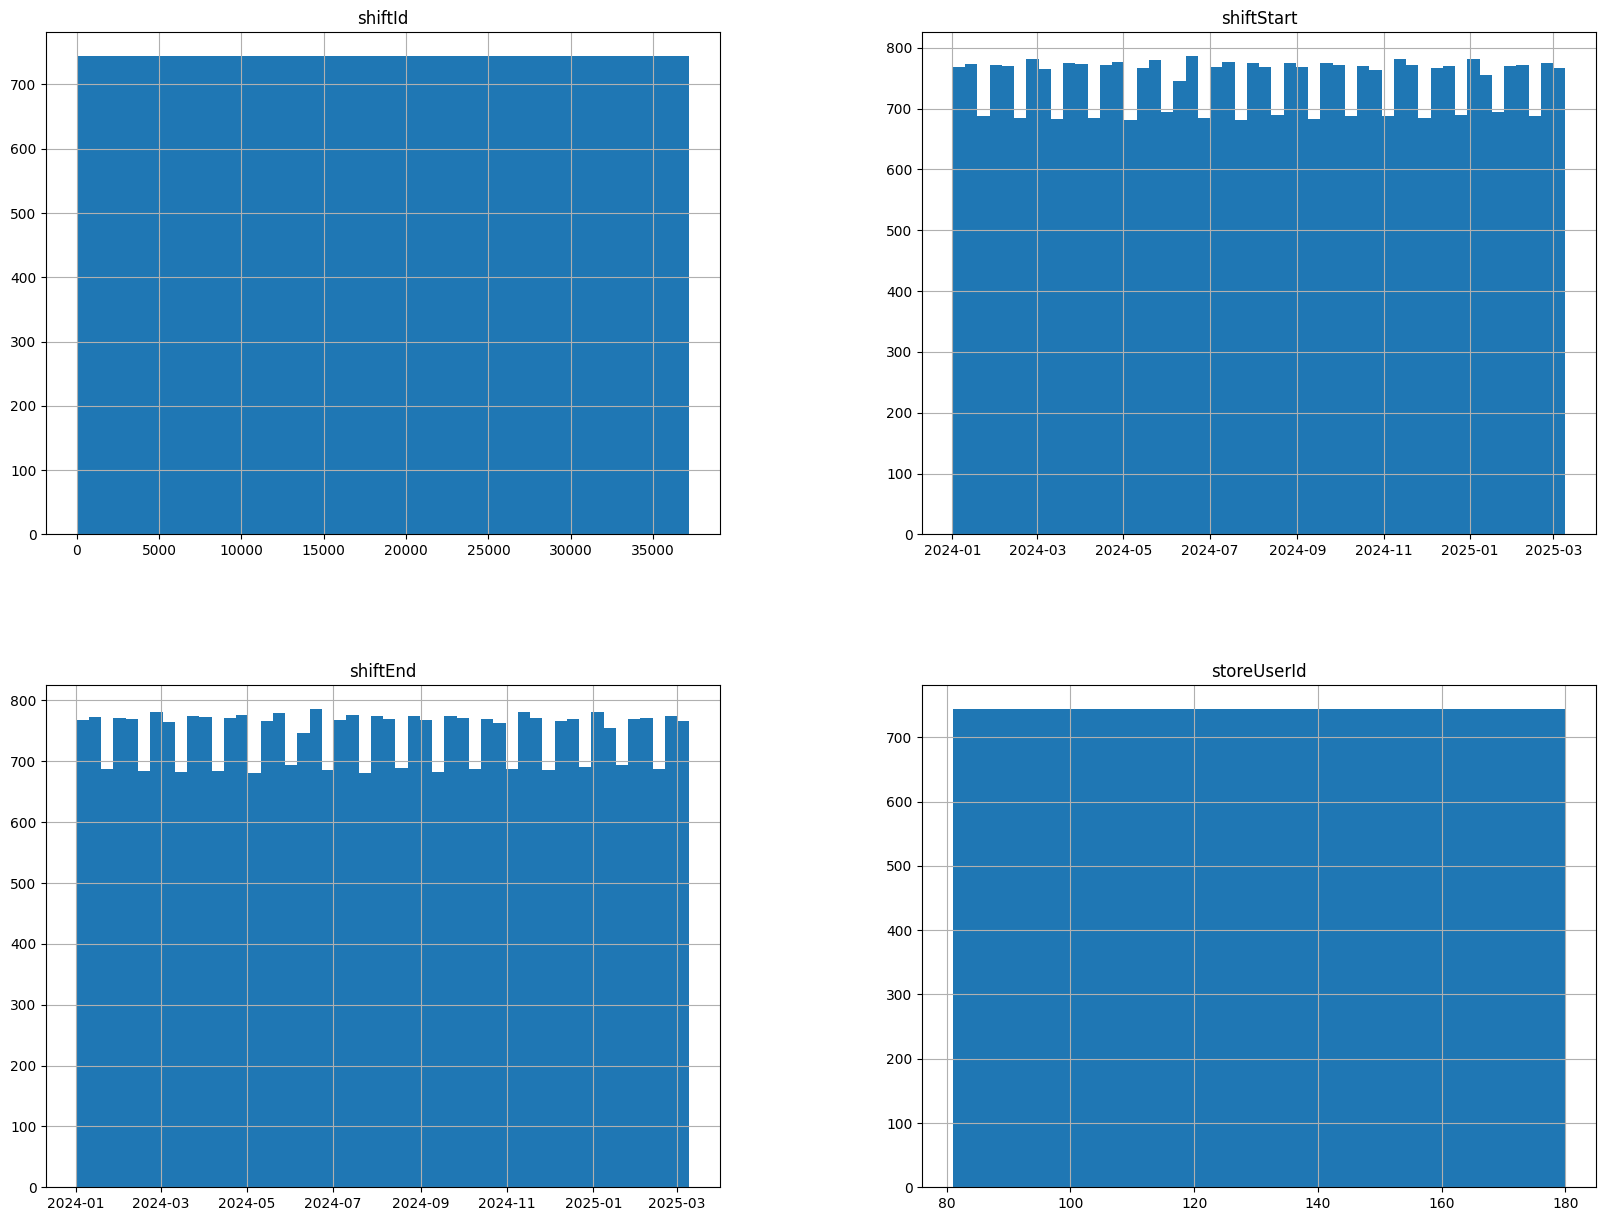

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

shifts_df.hist(bins=50, figsize=(20,15))
plt.show()

### Customers

In [140]:
def generate_customers(users_data, stores_data, store_users_data, total_customers=7000):
    customers_data = []
    customer_id = 1

    cashiers = {user["userId"] for user in users_data if user.get("roleId") == 4}

    store_users_mapping = {}
    for su in store_users_data:
        if su["userId"] in cashiers:
            store_users_mapping.setdefault(su["storeId"], []).append(su)

    for _ in range(total_customers):
        store = random.choice(stores_data)
        store_id = store['storeId']

        if store_id in store_users_mapping:
            store_user = random.choice(store_users_mapping[store_id])
            user_id = store_user['userId']
        else:
            continue

        name = fake.name()
        phone = fake.phone_number()
        choices = ['ACTIVE', 'INACTIVE']
        weights = [0.9, 0.1]
        status = random.choices(choices, weights=weights, k=1)[0]

        customers_data.append({
            "customerId": customer_id,
            "storeId": store_id,
            "userId": user_id,
            "name": fake.first_name() + " " + fake.last_name(),
            "phoneNumber": phone,
            "status": status
        })
        customer_id += 1

    return customers_data


In [141]:
customers_data = generate_customers(users_data, stores_data, store_users_data)
customers_df = pd.DataFrame(customers_data)
customers_df.to_csv('customers.csv', index=False)

In [142]:
customers_df['status'].value_counts()

,count
status,
ACTIVE,6261
INACTIVE,739


In [143]:
customers_df[customers_df['userId'] == 73]

,customerId,storeId,userId,name,phoneNumber,status
246,247,24,73,Balidin Sudiati,(0030) 537-1760,INACTIVE
277,278,24,73,Dagel Wahyuni,(0806) 202-3612,ACTIVE
854,855,24,73,Limar Hariyah,+62 (59) 292-4455,ACTIVE
962,963,24,73,Hilda Nugroho,0889136438,ACTIVE
972,973,24,73,Hesti Suryono,+62-298-651-9320,ACTIVE
1892,1893,24,73,Eka Nashiruddin,+62-0964-897-2482,ACTIVE
2304,2305,24,73,Rina Wahyuni,+62 (60) 066-3424,ACTIVE
2469,2470,24,73,Daryani Wahyuni,+62 (085) 116-4477,ACTIVE
2668,2669,24,73,Danuja Simbolon,+62 (333) 520 0415,ACTIVE
3129,3130,24,73,Jagaraga Hardiansyah,+62 (0752) 435 2806,ACTIVE


In [144]:
customers_df['userId'].value_counts()

,count
userId,
76,244
109,239
121,227
88,133
84,123
...,...
73,25
107,24
139,23


### Category

In [145]:
product_category_fnb_stores = {
    1: "Daging Beku",
    2: "Makanan Beku",
    3: "Makanan Instant",
    4: "Dessert",
    5: "Ice Cream",
    6: "Menu Sarapan",
    7: "Minuman",
    8: "Nasi Goreng",
    9: "Mie Goreng",
    10: "Kwetiaw",
    11: "Snack",
    12: "Menu Kremes"
}

product_category_fashion_stores = {
    1: "Pakaian Pria",
    2: "Pakaian Wanita",
    3: "Sepatu",
    4: "Sandal",
    5: "Tas",
    6: "Pakaian Bayi",
    7: "Aksesoris",
    8: "Kacamata",
    9: "Jam Tangan",
    10: "Pakaian Anak-anak",
    11: "Pakaian Bayi"
}

product_category_cosmetics_stores = {
    1: "Sabun Wajah",
    2: "Toner",
    3: "Serum",
    4: "Moistruizer",
    5: "Sunscreen Wajah",
    6: "Foundation",
    7: "Bedak",
    8: "Lipstik",
    9: "Maskara",
    10: "Shampoo",
    11: "Conditioner",
    12: "Pomade",
    13: "Parfum",
    14: "Deodoran",
    15: "Sisir",
    16: "Hairdreyer",
    17: "Catokan",
    18: "Hand Cream"
}

product_category_baby_child_stores = {
    1: "Popok Bayi",
    2: "Perlengkapan Mandi",
    3: "Pakaian Bayi",
    4: "Pakaian Anak-anak",
    5: "Susu Formula",
    6: "Makanan Bayi",
    7: "Mainan Edukasi",
    8: "Perlengkapan Makan Bayi",
    9: "Stroller",
    10: "Car Seat"
}

product_category_electronic_stores = {
    1: "Smartphone",
    2: "Laptop",
    3: "Proyektor",
    4: "Kamera",
    5: "Drone",
    6: "Mouse",
    7: "Keyboard",
    8: "Cooling Pad",
    9: "Charger Smartphone",
    10: "Power Bank",
    11: "Earphone",
    12: "Controller",
    13: "Headset",
    14: "Microphone",
    15: "TWS"
}

product_category_household_stores = {
    1: "Peralatan Dapur",
    2: "Alat Kebersihan",
    3: "Dekorasi Rumah",
    4: "Perabotan Kecil",
    5: "Gorden, Karpet & Keset",
    6: "Tempat Penyimpanan"
}

product_category_automotive_stores = {
    1: "Oli dan Cairan Kendaraan",
    2: "Aksesoris Mobil",
    3: "Aksesoris Motor",
    4: "Lampu Kendaraan",
    5: "Ban dan Sparepart",
    6: "Alat Servis Kendaraan",
    7: "Jasa",
}

product_category_algiculture = {
    1: "Pupuk dan Obat Tanaman",
    2: "Benih dan Bibit Tanaman",
    3: "Pakan Ternak",
    4: "Kandang dan Aksesoris Hewan",
    5: "Makanan Hewan Peliharaan",
    6: "Obat dan Vitamin Hewan"
}

product_category_hobby_stores = {
    1: "Mainan Anak",
    2: "Peralatan Olahraga",
    3: "Alat Pancing",
    4: "Teleskop",
    5: "Peralatan Camping",
    6: "Action Figure & Koleksi Hobi"
}

product_category_minimarket_stores = {
    1: "Sembako",
    2: "Makanan Ringan",
    3: "Minuman Kemasan",
    4: "Rokok",
    5: "Kebutuhan sehari-hari",
    6: "Peralatan Mandi & Kebersihan",
    7: "Obat-obatan Ringan",
    8: "Alat Tulis Kantor"
}

product_category_pharmacy_stores = {
    1: "Obat Bebas & Suplemen",
    2: "Alat Kesehatan",
    3: "Minuman Kesehatan",
    4: "Perawatan Luka",
    5: "Produk Kebersihan",
    6: "Alat Bantu Kesehatan"
}

product_category_credit_stores = {
    1: "Pulsa & Paket Data",
    2: "Token Listrik PLN",
    3: "Voucher Game",
    4: "Pembayaran Tagihan",
    5: "E-money & Top-up saldo"
}

category_mapping = {
        "Makanan & Minuman": product_category_fnb_stores,
        "Fashion & Aksesoris": product_category_fashion_stores,
        "Perawatan Diri & Kecantikan": product_category_cosmetics_stores,
        "Elektronik, Gadget & Alat Musik": product_category_electronic_stores,
        "Peralatan Bayi & Anak": product_category_baby_child_stores,
        "Minimarket & Kelontong": product_category_minimarket_stores,
        "Produk Kesehatan": product_category_pharmacy_stores,
        "Pulsa & Layanan": product_category_credit_stores,
        "Perlengkapan Rumah Tangga & Dekorasi": product_category_household_stores,
        "Otomotif & Suku Cadang": product_category_automotive_stores,
        "Pertanian, Peternakan & Toko Hewan": product_category_algiculture,
        "Mainan, Hobi & Peralatan Outdoor": product_category_hobby_stores
    }

In [146]:
def generate_categories(category_mapping):
    categories = []
    category_id_counter = 1
    for i, category_dict in category_mapping.items():
        for i, category_name in category_dict.items():
            categories.append({
                "categoryId": category_id_counter,
                "name": category_name
            })
            category_id_counter += 1
    return categories

In [147]:
categories_data = generate_categories(category_mapping)
categories_df = pd.DataFrame(categories_data)
categories_df.to_csv('categories.csv', index=False)

In [148]:
categories_df

,categoryId,name
0,1,Daging Beku
1,2,Makanan Beku
2,3,Makanan Instant
3,4,Dessert
4,5,Ice Cream
...,...,...
105,106,Peralatan Olahraga
106,107,Alat Pancing
107,108,Teleskop
108,109,Peralatan Camping


### Products

In [149]:
def generate_discount():
    # 80% kemungkinan diskon 0%, 20% kemungkinan diskon antara 1% - 20%
    has_discount = random.choices([0, 1], weights=[80, 20], k=1)[0]
    return 0 if has_discount == 0 else random.randint(1, 20)

In [150]:
def generate_products(stores_data, category_mapping, store_types_dict, categories_data, num_products_per_store_range=(6, 15)):
    products_data = []
    product_id = 1

    # Konversi categories_data ke DataFrame untuk pencarian kategori
    categories_df = pd.DataFrame(categories_data)

    for store in stores_data:
        store_id = store['storeId']
        store_type_id = store['storeTypeId']

        # Ambil tipe toko dari store_types_dict
        if store_type_id in store_types_dict:
            store_type_name = store_types_dict[store_type_id]

            # Ambil kategori produk berdasarkan tipe toko
            if store_type_name in category_mapping:
                product_categories = category_mapping[store_type_name]

                # Jumlah produk per toko secara acak dalam rentang yang diberikan
                num_products = random.randint(*num_products_per_store_range)

                for _ in range(num_products):
                    # Pilih kategori secara acak dari mapping
                    category_name = random.choice(list(product_categories.values()))
                    category_row = categories_df[categories_df['name'] == category_name]

                    if not category_row.empty:
                        category_id = category_row['categoryId'].values[0]
                    else:
                        # Fallback jika kategori tidak ditemukan (harusnya tidak terjadi jika data konsisten)
                        category_id = random.choice(categories_df['categoryId'].tolist())

                    # Nama produk realistis berdasarkan kategori
                    product_name = f"{category_name} {fake.word().capitalize()}"

                    # Tentukan managedBy secara realistis
                    # Misalnya: 70% produk dikelola oleh ADMIN_SCM, 30% oleh SUPER_SCM
                    managed_by = 'ADMIN_SCM' if random.random() < 0.7 else 'SUPER_SCM'

                    # Harga dasar realistis berdasarkan kategori (contoh sederhana)
                    base_price = random.randint(1000, 50000) * 1000  # Dalam satuan besar (BigInt)

                    products_data.append({
                        'productId': product_id,  # Menggunakan 'id' sesuai schema Prisma
                        'productCode': f'PRD-{random.randint(100000, 999999):06d}',  # Kode unik realistis
                        'serialNumber': random.randint(100000, 999999) if random.random() < 0.5 else None,  # Opsional
                        'categoryId': category_id,
                        'name': product_name,
                        'description': fake.sentence(nb_words=10),  # Deskripsi realistis
                        'discount': generate_discount(),
                        'basePrice': base_price,
                        'imageUrl': fake.image_url(),
                        'isActive': True,  # Default sesuai schema
                        'managedBy': managed_by,  # Enum ManagedBy
                        'storeId': store_id,  # Relasi ke Store
                        'createdAt': fake.date_time_this_year().isoformat(),  # Waktu realistis
                        'updatedAt': fake.date_time_this_year().isoformat(),
                    })
                    product_id += 1

    print(f"Generated {len(products_data)} products")
    return products_data

In [151]:
products_data = generate_products(stores_data, category_mapping, store_types_dict, categories_data)
products_df = pd.DataFrame(products_data)
products_df.to_csv('products.csv', index=False)

Generated 283 products


In [152]:
products_df

,productId,productCode,serialNumber,categoryId,name,description,discount,basePrice,imageUrl,isActive,managedBy,storeId,createdAt,updatedAt
0,1,PRD-569184,NaN,54,Headset Eaque,Impedit ullam maxime sequi quos mollitia dolor...,0,28385000,https://picsum.photos/413/534,True,SUPER_SCM,1,2025-02-20T10:16:34.729683,2025-02-20T14:15:48.716979
1,2,PRD-717717,NaN,45,Kamera Sed,Excepturi accusamus sequi asperiores eius sit ...,0,33302000,https://picsum.photos/373/687,True,SUPER_SCM,1,2025-01-30T11:34:04.837416,2025-02-12T11:41:32.793477
2,3,PRD-862186,NaN,42,Smartphone At,Voluptatibus natus laborum aut assumenda quod ...,0,48417000,https://dummyimage.com/996x920,True,ADMIN_SCM,1,2025-02-12T20:18:24.083710,2025-01-27T08:36:48.899122
3,4,PRD-314752,NaN,54,Headset Tenetur,Quis enim nemo quos porro optio repellat iusto...,0,38339000,https://dummyimage.com/110x983,True,ADMIN_SCM,1,2025-03-22T20:29:02.114770,2025-01-28T10:01:57.315692
4,5,PRD-403090,246276.0,50,Charger Smartphone Quos,Perspiciatis earum at neque hic eaque totam ne...,0,6532000,https://placekitten.com/982/85,True,ADMIN_SCM,1,2025-01-13T11:14:46.691015,2025-01-31T19:16:54.661867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,279,PRD-624861,475250.0,107,Alat Pancing Odit,Laboriosam quasi eius quae repudiandae explica...,0,48533000,https://picsum.photos/72/409,True,ADMIN_SCM,30,2025-01-07T09:48:23.604330,2025-01-21T00:54:34.500241
279,280,PRD-127495,NaN,107,Alat Pancing Atque,Doloremque voluptas earum corporis placeat min...,14,10855000,https://placekitten.com/845/406,True,ADMIN_SCM,30,2025-02-06T07:32:16.968139,2025-01-06T05:19:40.129607
280,281,PRD-599967,NaN,105,Mainan Anak Fugiat,Molestiae nobis perspiciatis commodi hic sit e...,0,14170000,https://dummyimage.com/650x359,True,SUPER_SCM,30,2025-01-12T01:02:26.333219,2025-03-14T13:21:36.154430
281,282,PRD-186330,NaN,110,Action Figure & Koleksi Hobi Qui,Ipsam quo dignissimos facilis reprehenderit ve...,12,34194000,https://picsum.photos/319/421,True,SUPER_SCM,30,2025-01-09T04:24:35.331481,2025-03-09T17:12:17.342104


### Variant Types

In [153]:
variant_types = {
    "FNB": ["Rasa", "Ukuran", "Kemasan"],
    "Fashion": ["Warna", "Ukuran", "Bahan"],
    "Cosmetics": ["Tipe", "Kandungan", "Aroma"],
    "Baby & Child": ["Ukuran", "Bahan", "Merek"],
    "Electronics": ["Warna", "Kapasitas", "Tipe"],
    "Household": ["Warna", "Ukuran", "Material"],
    "Automotive": ["Jenis", "Warna", "Merek"],
    "Agriculture": ["Jenis", "Berat", "Kemasan"],
    "Hobby": ["Jenis", "Ukuran", "Merek"],
    "Minimarket": ["Ukuran", "Rasa", "Kemasan"],
    "Pharmacy": ["Dosis", "Kemasan", "Tipe"],
    "Credit": ["Nominal", "Operator", "Jenis"]
}

In [154]:
def generate_variant_types():
    variant_types_data = []
    variant_types_id = 1

    for variant_type in set([vt for sublist in variant_types.values() for vt in sublist]):
        variant_types_data.append({
            'variantTypeId': variant_types_id,
            'name': variant_type
        })
        variant_types_id += 1
    return variant_types_data

In [155]:
variant_types_data = generate_variant_types()
variant_types_df = pd.DataFrame(variant_types_data)
variant_types_df.to_csv('variant_types.csv', index=False)

In [156]:
variant_types_df

,variantTypeId,name
0,1,Jenis
1,2,Nominal
2,3,Kemasan
3,4,Bahan
4,5,Kandungan
5,6,Aroma
6,7,Material
7,8,Dosis
8,9,Warna
9,10,Kapasitas


### Variant Options

In [157]:
variant_options = {
    "Rasa": ["Manis", "Asin", "Pedas", "Gurih"],
    "Ukuran": ["S", "M", "L", "XL"],
    "Kemasan": ["Plastik", "Karton", "Botol", "Kaleng"],
    "Warna": ["Merah", "Biru", "Hitam", "Putih", "Hijau"],
    "Bahan": ["Katun", "Denim", "Linen", "Sutra"],
    "Tipe": ["Cair", "Padat", "Spray"],
    "Kapasitas": ["16GB", "32GB", "64GB", "128GB"],
    "Material": ["Kayu", "Besi", "Plastik", "Aluminium"],
    "Merek": ["Brand A", "Brand B", "Brand C"],
    "Berat": ["250gr", "500gr", "1kg", "5kg"],
    "Dosis": ["100mg", "250mg", "500mg"],
    "Nominal": ["10.000", "25.000", "50.000", "100.000"],
    "Operator": ["Telkomsel", "XL", "Indosat", "Tri"],
    "Jenis": ["Elektrik", "Manual", "Digital", "Hybrid"],
    "Kandungan": ["Vitamin C", "Kolagen", "Hyaluronic Acid"],
    "Aroma": ["Floral", "Buah", "Vanilla"]
}

In [158]:
def generate_variant_options(variant_types_data):
    variant_options_data = []
    variant_option_id = 1

    for variant_type_name, options in variant_options.items():
        variant_type_id = None
        for variant_type in variant_types_data:
            if variant_type['name'] == variant_type_name:
                variant_type_id = variant_type['variantTypeId']
                break

        if variant_type_id is None:
            print(f'Tidak ditemukan variant_type untuk {variant_type_name}')
            continue

        for option_name in options:
            price = random.randint(1000, 50000)
            choices = ['ACTIVE', 'INACTIVE']
            weights = [0.8, 0.2]
            status = random.choices(choices, weights=weights, k=1)[0]
            variant_options_data.append({
                'variantOptionId': variant_option_id,
                'variantTypeId': variant_type_id,
                'name': option_name,
                'price': price,
                'status': status
            })
            variant_option_id += 1

    return variant_options_data

In [159]:
variant_options_data = generate_variant_options(variant_types_data)
variant_options_df = pd.DataFrame(variant_options_data)
variant_options_df.to_csv('variant_options.csv', index=False)

In [160]:
variant_options_df

,variantOptionId,variantTypeId,name,price,status
0,1,11,Manis,6789,ACTIVE
1,2,11,Asin,29017,ACTIVE
2,3,11,Pedas,21946,ACTIVE
3,4,11,Gurih,26439,ACTIVE
4,5,12,S,9224,ACTIVE
5,6,12,M,10765,INACTIVE
6,7,12,L,18765,ACTIVE
7,8,12,XL,24625,ACTIVE
8,9,3,Plastik,2001,INACTIVE
9,10,3,Karton,34215,INACTIVE


### Variants dan Variant Option Variants

In [161]:
category_to_variant = {
    "Makanan & Minuman": "FNB",
    "Fashion & Aksesoris": "Fashion",
    "Perawatan Diri & Kecantikan": "Cosmetics",
    "Elektronik, Gadget & Alat Musik": "Electronics",
    "Peralatan Bayi & Anak": "Baby & Child",
    "Minimarket & Kelontong": "Minimarket",
    "Produk Kesehatan": "Pharmacy",
    "Pulsa & Layanan": "Credit",
    "Perlengkapan Rumah Tangga & Dekorasi": "Household",
    "Otomotif & Suku Cadang": "Automotive",
    "Pertanian, Peternakan & Toko Hewan": "Agriculture",
    "Mainan, Hobi & Peralatan Outdoor": "Hobby"
}

In [162]:
def find_main_category(product_category):
    for main_category, sub_categories in category_mapping.items():
        if product_category in sub_categories.values():
            return main_category
    return None

In [163]:
def generate_variants(products_df, categories_df, variant_types, variant_options, variant_options_data):
    variants_data = []
    variant_option_variants_data = []
    variant_id = 1
    variant_option_variant_id = 1

    # Pastikan variant_options_data dalam bentuk list
    variant_options_data = list(variant_options_data)

    product_category_merge = products_df.merge(categories_df, on='categoryId', how='left')

    for _, row in product_category_merge.iterrows():
        product_id = row['productId']
        category_name = row['name_y']

        print(f"Product ID: {product_id}, Category: {category_name}")

        main_category = find_main_category(category_name)
        if not main_category or main_category not in category_to_variant:
            print(f"  -> Main category tidak ditemukan atau tidak ada di category_to_variant: {main_category}")
            continue

        variant_category = category_to_variant[main_category]
        if variant_category not in variant_types:
            print(f"  -> Variant category tidak ada di variant_types: {variant_category}")
            continue

        possible_variant_types = variant_types[variant_category]
        num_variants = random.randint(1, len(possible_variant_types))  # 1 atau lebih tipe varian
        selected_variant_types = random.sample(possible_variant_types, num_variants)

        print(f"  -> Variant Category: {variant_category}, Possible Types: {possible_variant_types}, Selected Types: {selected_variant_types}")

        # Tambahkan entri ke variants_data untuk setiap tipe varian yang dipilih
        for variant_type in selected_variant_types:
            variants_data.append({
                'variantId': variant_id,
                'productId': product_id
            })

        # Reset daftar opsi untuk debugging
        added_options = []

        for variant_type in selected_variant_types:
            if variant_type in variant_options:
                print(f"    -> Variant Type: {variant_type}, Available Options: {variant_options[variant_type]}")
                for option_name in variant_options[variant_type]:
                    # Cari opsi yang cocok di variant_options_data
                    matching_option = next((opt for opt in variant_options_data if opt['name'] == option_name), None)
                    if matching_option:
                        variant_option_variants_data.append({
                            'variantOptionVariantId': variant_option_variant_id,
                            'variantId': variant_id,
                            'variantOptionId': matching_option['variantOptionId']
                        })
                        added_options.append(option_name)
                        print(f"      -> Added Option: {option_name} (variantOptionId: {matching_option['variantOptionId']})")
                        variant_option_variant_id += 1
                    else:
                        print(f"      -> Option {option_name} tidak ditemukan di variant_options_data")
            else:
                print(f"    -> Variant Type {variant_type} tidak ada di variant_options")

        # Debugging: Cek semua opsi yang ditambahkan untuk variant ini
        print(f"  -> Total Options Added for variantId {variant_id}: {len(added_options)} - {added_options}")

        variant_id += 1

    return variants_data, variant_option_variants_data

In [164]:
variants_data, variant_option_variants_data = generate_variants(products_df, categories_df, variant_types, variant_options, variant_options_data)
variants_df = pd.DataFrame(variants_data)
variant_option_variants_df = pd.DataFrame(variant_option_variants_data)
variants_df.to_csv('variants.csv', index=False)
variant_option_variants_df.to_csv('variant_option_variants.csv', index=False)

Product ID: 1, Category: Headset
  -> Variant Category: Electronics, Possible Types: ['Warna', 'Kapasitas', 'Tipe'], Selected Types: ['Warna']
    -> Variant Type: Warna, Available Options: ['Merah', 'Biru', 'Hitam', 'Putih', 'Hijau']
      -> Added Option: Merah (variantOptionId: 13)
      -> Added Option: Biru (variantOptionId: 14)
      -> Added Option: Hitam (variantOptionId: 15)
      -> Added Option: Putih (variantOptionId: 16)
      -> Added Option: Hijau (variantOptionId: 17)
  -> Total Options Added for variantId 1: 5 - ['Merah', 'Biru', 'Hitam', 'Putih', 'Hijau']
Product ID: 2, Category: Kamera
  -> Variant Category: Electronics, Possible Types: ['Warna', 'Kapasitas', 'Tipe'], Selected Types: ['Kapasitas']
    -> Variant Type: Kapasitas, Available Options: ['16GB', '32GB', '64GB', '128GB']
      -> Added Option: 16GB (variantOptionId: 25)
      -> Added Option: 32GB (variantOptionId: 26)
      -> Added Option: 64GB (variantOptionId: 27)
      -> Added Option: 128GB (variantOp

In [165]:
variants_df

,variantId,productId
0,1,1
1,2,2
2,3,3
3,3,3
4,3,3
...,...,...
530,282,282
531,282,282
532,283,283
533,283,283


In [166]:
variant_option_variants_df

,variantOptionVariantId,variantId,variantOptionId
0,1,1,13
1,2,1,14
2,3,1,15
3,4,1,16
4,5,1,17
...,...,...,...
2033,2034,283,7
2034,2035,283,8
2035,2036,283,33
2036,2037,283,34


In [167]:
variant_option_variants_df[variant_option_variants_df['variantId'] == 243]

,variantOptionVariantId,variantId,variantOptionId
1746,1747,243,51
1747,1748,243,52
1748,1749,243,53
1749,1750,243,54
1750,1751,243,33
1751,1752,243,34
1752,1753,243,35


### Payment Methods

In [168]:
payment_methods = {
    'BRI': 'YES',
    'Cash': 'NO',
    'QRIS': 'YES',
    'DANA': 'YES',
    'OVO': 'YES',
    'Mandiri': 'YES',
    'BNI': 'YES'
}

In [169]:
def generate_payment_methods():
    payment_methods_data = []
    payment_method_id = 1

    for name, is_cash in payment_methods.items():
        payment_methods_data.append({
            'paymentMethodId': payment_method_id,
            'name': name,
            'image': fake.image_url(),
            'isCash': is_cash
        })
        payment_method_id += 1

    return payment_methods_data

In [170]:
payment_methods_data = generate_payment_methods()
payment_methods_df = pd.DataFrame(payment_methods_data)
payment_methods_df.to_csv('payment_methods.csv', index=False)

In [171]:
payment_methods_df

,paymentMethodId,name,image,isCash
0,1,BRI,https://placekitten.com/864/82,YES
1,2,Cash,https://dummyimage.com/433x138,NO
2,3,QRIS,https://picsum.photos/559/222,YES
3,4,DANA,https://placekitten.com/206/854,YES
4,5,OVO,https://dummyimage.com/450x21,YES
5,6,Mandiri,https://placekitten.com/872/945,YES
6,7,BNI,https://placekitten.com/134/902,YES


### Transactions

In [172]:
taxes = {
    'PPn': 12,
    'PPh': 0.5,
    'Pajak Daerah': 2
}

national_holidays = {
    # 2024
    datetime(2024, 1, 1): "Tahun Baru Masehi",
    datetime(2024, 2, 8): "Isra Mi'raj",
    datetime(2024, 2, 9): "Cuti Bersama Tahun Baru Imlek",
    datetime(2024, 2, 10): "Tahun Baru Imlek",
    datetime(2024, 2, 14): "Hari Pemungutan Suara",
    datetime(2024, 3, 11): "Hari Suci Nyepi",
    datetime(2024, 3, 12): "Cuti Bersama Hari Suci Nyepi",
    datetime(2024, 3, 29): "Jumat Agung",
    datetime(2024, 4, 8): "Cuti Bersama Lebaran",
    datetime(2024, 4, 9): "Cuti Bersama Lebaran",
    datetime(2024, 4, 10): "Hari Raya Idul Fitri",
    datetime(2024, 4, 11): "Cuti Bersama Lebaran",
    datetime(2024, 4, 12): "Cuti Bersama Lebaran",
    datetime(2024, 4, 15): "Cuti Bersama Lebaran",
    datetime(2024, 5, 1): "Hari Buruh",
    datetime(2024, 5, 9): "Kenaikan Isa Almasih",
    datetime(2024, 5, 10): "Cuti Bersama Kenaikan Isa Almasih",
    datetime(2024, 5, 23): "Hari Waisak",
    datetime(2024, 5, 24): "Cuti Bersama Hari Waisak",
    datetime(2024, 6, 1): "Hari Lahir Pancasila",
    datetime(2024, 6, 17): "Idul Adha",
    datetime(2024, 6, 18): "Cuti Bersama Idul Adha",
    datetime(2024, 7, 7): "Tahun Baru Islam",
    datetime(2024, 8, 17): "Hari Kemerdekaan",
    datetime(2024, 9, 16): "Maulid Nabi Muhammad SAW",
    datetime(2024, 11, 27): "Hari Libur Pilkada",
    datetime(2024, 12, 25): "Hari Natal",
    datetime(2024, 12, 26): "Cuti Bersama Hari Natal",
    # 2025
    datetime(2025, 1, 1): "Tahun Baru Masehi",
    datetime(2025, 1, 27): "Isra Mi'raj",
    datetime(2025, 1, 28): "Cuti Bersama Tahun Baru Imlek",
    datetime(2025, 1, 29): "Tahun Baru Imlek",
    datetime(2025, 3, 28): "Cuti Bersama Hari Suci Nyepi",
    datetime(2025, 3, 29): "Hari Suci Nyepi",
    datetime(2025, 3, 31): "Hari Raya Idul Fitri",
    datetime(2025, 4, 1): "Cuti Bersama Lebaran",
    datetime(2025, 4, 2): "Cuti Bersama Lebaran",
    datetime(2025, 4, 3): "Cuti Bersama Lebaran",
    datetime(2025, 4, 4): "Cuti Bersama Lebaran",
    datetime(2025, 4, 7): "Cuti Bersama Lebaran"
}

In [173]:
def weighted_transactions_time(shift_start, shift_end, store_type_id):
    hour_weights_by_store_type = {
        1: {11: 20, 12: 25, 13: 20, 17: 15, 18: 20, 19: 25, 20: 15},  # Makanan & Minuman
        2: {10: 15, 11: 20, 14: 20, 15: 25, 16: 25, 17: 20},         # Fashion
        3: {9: 15, 10: 20, 11: 20, 16: 20, 17: 25, 18: 20},          # Kecantikan
        4: {10: 15, 11: 20, 14: 20, 15: 25, 16: 20},                # Elektronik
        5: {9: 15, 10: 20, 11: 20, 14: 20, 15: 20},                 # Rumah Tangga
        6: {8: 15, 9: 20, 10: 20, 14: 20, 15: 15},                  # Otomotif
        7: {7: 20, 8: 25, 9: 20, 10: 15},                           # Pertanian
        8: {10: 15, 11: 20, 14: 20, 15: 25, 16: 25},                # Hobi
        9: {9: 15, 10: 20, 11: 20, 14: 20, 15: 20},                 # Bayi
        10: {0: 5, 1: 5, 7: 15, 8: 20, 9: 20, 17: 25, 18: 25, 19: 20, 20: 15, 21: 10, 22: 5},  # Minimarket
        11: {8: 20, 9: 25, 10: 20, 14: 15, 15: 15},                 # Kesehatan
        12: {8: 15, 9: 20, 10: 20, 17: 20, 18: 20}                  # Pulsa
    }

    day_weights_by_store_type = {
        1: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 15, 6: 20},
        2: {0: 5, 1: 5, 2: 5, 3: 5, 4: 15, 5: 20, 6: 15},
        3: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 15, 6: 15},
        4: {0: 10, 1: 10, 2: 10, 3: 10, 4: 15, 5: 15, 6: 10},
        5: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 15, 6: 15},
        6: {0: 10, 1: 10, 2: 10, 3: 10, 4: 15, 5: 10, 6: 5},
        7: {0: 15, 1: 15, 2: 10, 3: 10, 4: 10, 5: 5, 6: 5},
        8: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 20, 6: 25},
        9: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 15, 6: 15},
        10: {0: 10, 1: 10, 2: 10, 3: 10, 4: 15, 5: 20, 6: 20},
        11: {0: 15, 1: 15, 2: 10, 3: 10, 4: 10, 5: 5, 6: 5},
        12: {0: 10, 1: 10, 2: 10, 3: 10, 4: 15, 5: 15, 6: 15}
    }

    payday_weights = {day: 25 if 1 <= day <= 5 else 5 for day in range(1, 32)}
    month_weights_by_store_type = {
        1: {3: 20, 4: 20, 12: 15},
        2: {12: 20},
        3: {12: 15},
        4: {12: 15},
        5: {12: 20},
        6: {},
        7: {3: 15, 4: 15},
        8: {12: 20},
        9: {12: 15},
        10: {3: 20, 4: 20, 12: 15},
        11: {3: 15, 4: 15},
        12: {}
    }

    all_hours = list(range(shift_start.hour, shift_end.hour + 1))
    if shift_end.hour < shift_start.hour:  # Shift lintas hari
        all_hours = list(range(shift_start.hour, 24)) + list(range(0, shift_end.hour + 1))
    hour_weights = hour_weights_by_store_type.get(store_type_id, {8: 10, 9: 10, 12: 15, 13: 14, 17: 20, 18: 20})
    hour_probability = [hour_weights.get(h, 5) for h in all_hours]

    delta = (shift_end - shift_start).days
    if delta < 0:  # Shift dalam satu hari
        delta = (shift_end - shift_start).total_seconds() / 86400
    random_day = shift_start + timedelta(days=random.randint(0, max(0, int(delta))))

    holiday_factor = 1.5 if random_day.date() in [d.date() for d in national_holidays.keys()] else 1.0
    if store_type_id in [1, 10] and "Natal" in national_holidays.get(random_day.date(), ""):
        holiday_factor = 2.0

    day_weights = day_weights_by_store_type.get(store_type_id, {0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 10, 6: 15})
    weighted_day = random.choices(list(day_weights.keys()), weights=[w * holiday_factor for w in day_weights.values()], k=1)[0]
    random_day = random_day + timedelta(days=(weighted_day - random_day.weekday()) % 7)

    day_of_month = random_day.day
    if random.random() < (payday_weights[day_of_month] / 25):
        random_day = random_day.replace(day=random.randint(1, 5))

    month = random_day.month
    month_factor = month_weights_by_store_type.get(store_type_id, {}).get(month, 10) / 10
    if random.random() < month_factor - 1:
        random_day = random_day.replace(month=month)

    hour = random.choices(all_hours, weights=hour_probability, k=1)[0]
    minute = random.randint(0, 59)
    second = random.randint(0, 59)

    return random_day.replace(hour=hour, minute=minute, second=second)

In [174]:
def get_store_operation_hours(store_type_id):
    if store_type_id in [10, 11]:  # Minimarket & Kesehatan
        rand = random.random()
        if rand < 0.6:
            return 12
        elif rand < 0.9:
            return 8
        else:
            return 24
    else:
        return 8 if random.random() < 0.7 else 12

In [175]:
def generate_transactions(
        shifts_df,
        customers_df,
        products_df,
        variants_df,
        variant_options_df,
        variant_option_variants_df,
        payment_methods_df,
        store_users_df,
        users_df,
        stores_df,
        store_ids=None
    ):
    transactions_data = []
    transaction_details_data = []
    transaction_id = 1
    transaction_detail_id = 1

    start_date = datetime(2024, 1, 1)  # 1 tahun dari sekarang ke belakang
    end_date = datetime(2025, 3, 19)

    customers_by_store = customers_df.groupby('storeId')
    cashier_users = users_df[users_df['roleId'] == 4]
    cashier_store_users = store_users_df[store_users_df['userId'].isin(cashier_users['userId'])]

    if store_ids is not None:
        store_ids = [store_ids] if isinstance(store_ids, int) else store_ids
        cashier_store_users = cashier_store_users[cashier_store_users['storeId'].isin(store_ids)]

    cashier_store_users_by_store = cashier_store_users.groupby('storeId')
    valid_store_user_ids = cashier_store_users['storeUserId']
    shifts_df = shifts_df[shifts_df['storeUserId'].isin(valid_store_user_ids)]
    shifts_by_store_user = shifts_df.groupby('storeUserId')

    store_operation_hours = {store["storeId"]: get_store_operation_hours(store["storeTypeId"]) for store in stores_df.to_dict('records')}

    for store_id, store_cashiers in cashier_store_users_by_store:
        store_type_id = stores_df.loc[stores_df['storeId'] == store_id, 'storeTypeId'].iloc[0]
        operation_hours = store_operation_hours[store_id]

        # Tentukan target transaksi berdasarkan tipe toko dan jam operasional
        if store_type_id in [10, 11] and operation_hours == 24:
            target_transactions = random.randint(15000, 30000)  # Minimarket/Kesehatan 24 jam
        elif store_type_id in [10, 11]:
            target_transactions = random.randint(5000, 15000)  # Minimarket/Kesehatan 8-12 jam
        else:
            target_transactions = random.randint(3000, 10000)  # Toko kecil

        store_transaction_count = 0
        store_customers = customers_by_store.get_group(store_id) if store_id in customers_by_store.groups else pd.DataFrame()
        store_products_df = products_df[products_df['storeId'] == store_id]

        if store_customers.empty or store_products_df.empty:
            print(f"Tidak ada customer/produk untuk store_id {store_id}. Skip.")
            continue

        # Distribusikan transaksi ke setiap shift
        store_shifts = shifts_df[shifts_df['storeUserId'].isin(store_cashiers['storeUserId'])]
        if store_shifts.empty:
            continue

        # Hitung transaksi harian rata-rata
        days_operational = 312  # Asumsi tutup 1 hari/minggu
        avg_daily_transactions = target_transactions // days_operational
        cashier_count = len(store_cashiers)

        for _, shift in store_shifts.iterrows():
            shift_start = pd.to_datetime(shift['shiftStart'])
            shift_end = pd.to_datetime(shift['shiftEnd'])
            shift_date = shift_start.date()
            is_weekend = shift_date.weekday() >= 5
            is_holiday = shift_date in [d.date() for d in national_holidays.keys()]

            # Tentukan jumlah transaksi per shift
            base_transactions = avg_daily_transactions // (24 // operation_hours) // cashier_count
            daily_factor = 1.3 if is_weekend else 1.0
            holiday_factor = 1.5 if is_holiday and store_type_id in [1, 10] else 1.0
            shift_transactions = int(base_transactions * daily_factor * holiday_factor)
            shift_transactions = max(1, min(shift_transactions, 50))  # Batasi 1-50 per shift

            for _ in range(shift_transactions):
                if store_transaction_count >= target_transactions:
                    break

                customer_id = store_customers.sample(n=1)['customerId'].iloc[0]
                user_id = store_cashiers.sample(n=1)['userId'].iloc[0]
                payment_method = payment_methods_df.sample(n=1).iloc[0]
                payment_method_id = payment_method['paymentMethodId']
                is_cash = payment_method['isCash']

                transaction_date = weighted_transactions_time(shift_start, shift_end, store_type_id)
                num_products = random.randint(1, 5)
                selected_products = store_products_df.sample(n=min(num_products, len(store_products_df))).to_dict('records')
                subtotal_all = 0

                for product in selected_products:
                    product_id = product['productId']
                    available_variants = variants_df[variants_df['productId'] == product_id]
                    if not available_variants.empty:
                        variant = available_variants.sample(n=1).iloc[0]
                        variant_id = variant['variantId']
                        available_options = variant_option_variants_df[
                            variant_option_variants_df['variantId'] == variant_id
                        ]
                        if not available_options.empty:
                            variant_option = available_options.sample(n=1).iloc[0]
                            variant_option_id = variant_option['variantOptionId']

                            product_quantity = random.randint(1, 5)
                            product_price = product['basePrice']
                            variant_option_data = variant_options_df[
                                variant_options_df['variantOptionId'] == variant_option_id
                            ].iloc[0]
                            variant_price = variant_option_data['price']

                            subtotal = (product_price + variant_price) * product_quantity
                            subtotal_all += subtotal

                            transaction_details_data.append({
                                'transactionDetailId': transaction_detail_id,
                                'transactionId': transaction_id,
                                'productId': product_id,
                                'variantId': variant_id,
                                'quantity': product_quantity,
                                'subtotal': subtotal
                            })
                            transaction_detail_id += 1

                tax_amount = sum(subtotal_all * (rate / 100) for rate in taxes.values())
                total_amount = subtotal_all + tax_amount
                discount = random.randint(0, int(total_amount * 0.1))
                total_amount -= discount

                if is_cash == "YES":
                    cash = total_amount + random.randint(0, 5000)
                    change = cash - total_amount
                else:
                    cash = total_amount
                    change = 0

                transactions_data.append({
                    'transactionId': transaction_id,
                    'invoiceId': f'INV-{random.randint(100000000000, 999999999999)}',
                    'customerId': customer_id,
                    'userId': user_id,
                    'storeId': store_id,
                    'paymentMethodId': payment_method_id,
                    'totalAmount': total_amount,
                    'cash': cash,
                    'change': change,
                    'discount': discount,
                    'transactionDate': transaction_date,
                    'status': 'COMPLETED'
                })
                transaction_id += 1
                store_transaction_count += 1

        print(f"Selesai generate {store_transaction_count} transaksi untuk store_id {store_id}")

    return transactions_data, transaction_details_data

In [176]:
transactions_data, transaction_details_data = generate_transactions(
    shifts_df, customers_df, products_df, variants_df, variant_options_df,
    variant_option_variants_df, payment_methods_df, store_users_df, users_df,
    stores_df
)

transactions_df = pd.DataFrame(transactions_data)
transaction_details_df = pd.DataFrame(transaction_details_data)
transactions_df.to_csv('transactions.csv', index=False)
transaction_details_df.to_csv('transaction_details.csv', index=False)

Selesai generate 1116 transaksi untuk store_id 1
Selesai generate 1488 transaksi untuk store_id 2
Selesai generate 1488 transaksi untuk store_id 3
Selesai generate 8835 transaksi untuk store_id 4
Selesai generate 1488 transaksi untuk store_id 5
Selesai generate 1116 transaksi untuk store_id 6
Selesai generate 3182 transaksi untuk store_id 7
Selesai generate 2232 transaksi untuk store_id 8
Selesai generate 1116 transaksi untuk store_id 9
Selesai generate 4594 transaksi untuk store_id 10
Selesai generate 2976 transaksi untuk store_id 11
Selesai generate 2232 transaksi untuk store_id 12
Selesai generate 1599 transaksi untuk store_id 13
Selesai generate 2976 transaksi untuk store_id 14
Selesai generate 18600 transaksi untuk store_id 15
Selesai generate 1488 transaksi untuk store_id 16
Selesai generate 3185 transaksi untuk store_id 17
Selesai generate 2232 transaksi untuk store_id 18
Selesai generate 744 transaksi untuk store_id 19
Selesai generate 1488 transaksi untuk store_id 20
Selesai g

In [177]:
transactions_df

,transactionId,invoiceId,customerId,userId,storeId,paymentMethodId,totalAmount,cash,change,discount,transactionDate,status
0,1,INV-186647148911,5876,67,1,7,8.193597e+08,8.193645e+08,4879.0,35723763,2024-01-01 14:30:02,COMPLETED
1,2,INV-405794149251,4509,150,1,5,4.496456e+08,4.496484e+08,2802.0,22300166,2024-01-02 11:29:12,COMPLETED
2,3,INV-509866268195,4356,67,1,1,2.134121e+08,2.134160e+08,3933.0,22359124,2024-01-01 14:45:08,COMPLETED
3,4,INV-590049956736,542,150,1,2,8.368264e+07,8.368264e+07,0.0,4184258,2024-01-05 15:38:21,COMPLETED
4,5,INV-462889996763,432,85,1,5,4.781262e+08,4.781285e+08,2251.0,28144297,2024-01-11 15:00:45,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
90177,90178,INV-354482591496,6840,76,30,3,4.536719e+08,4.536754e+08,3583.0,17948624,2025-03-04 15:07:09,COMPLETED
90178,90179,INV-951939407373,2971,76,30,3,5.071381e+08,5.071405e+08,2408.0,46310723,2025-03-09 10:59:08,COMPLETED
90179,90180,INV-207896769582,5059,76,30,4,1.833143e+08,1.833164e+08,2064.0,4698210,2025-03-14 11:35:27,COMPLETED
90180,90181,INV-893903919908,95,76,30,5,2.377403e+08,2.377450e+08,4676.0,20778070,2025-03-01 13:55:41,COMPLETED


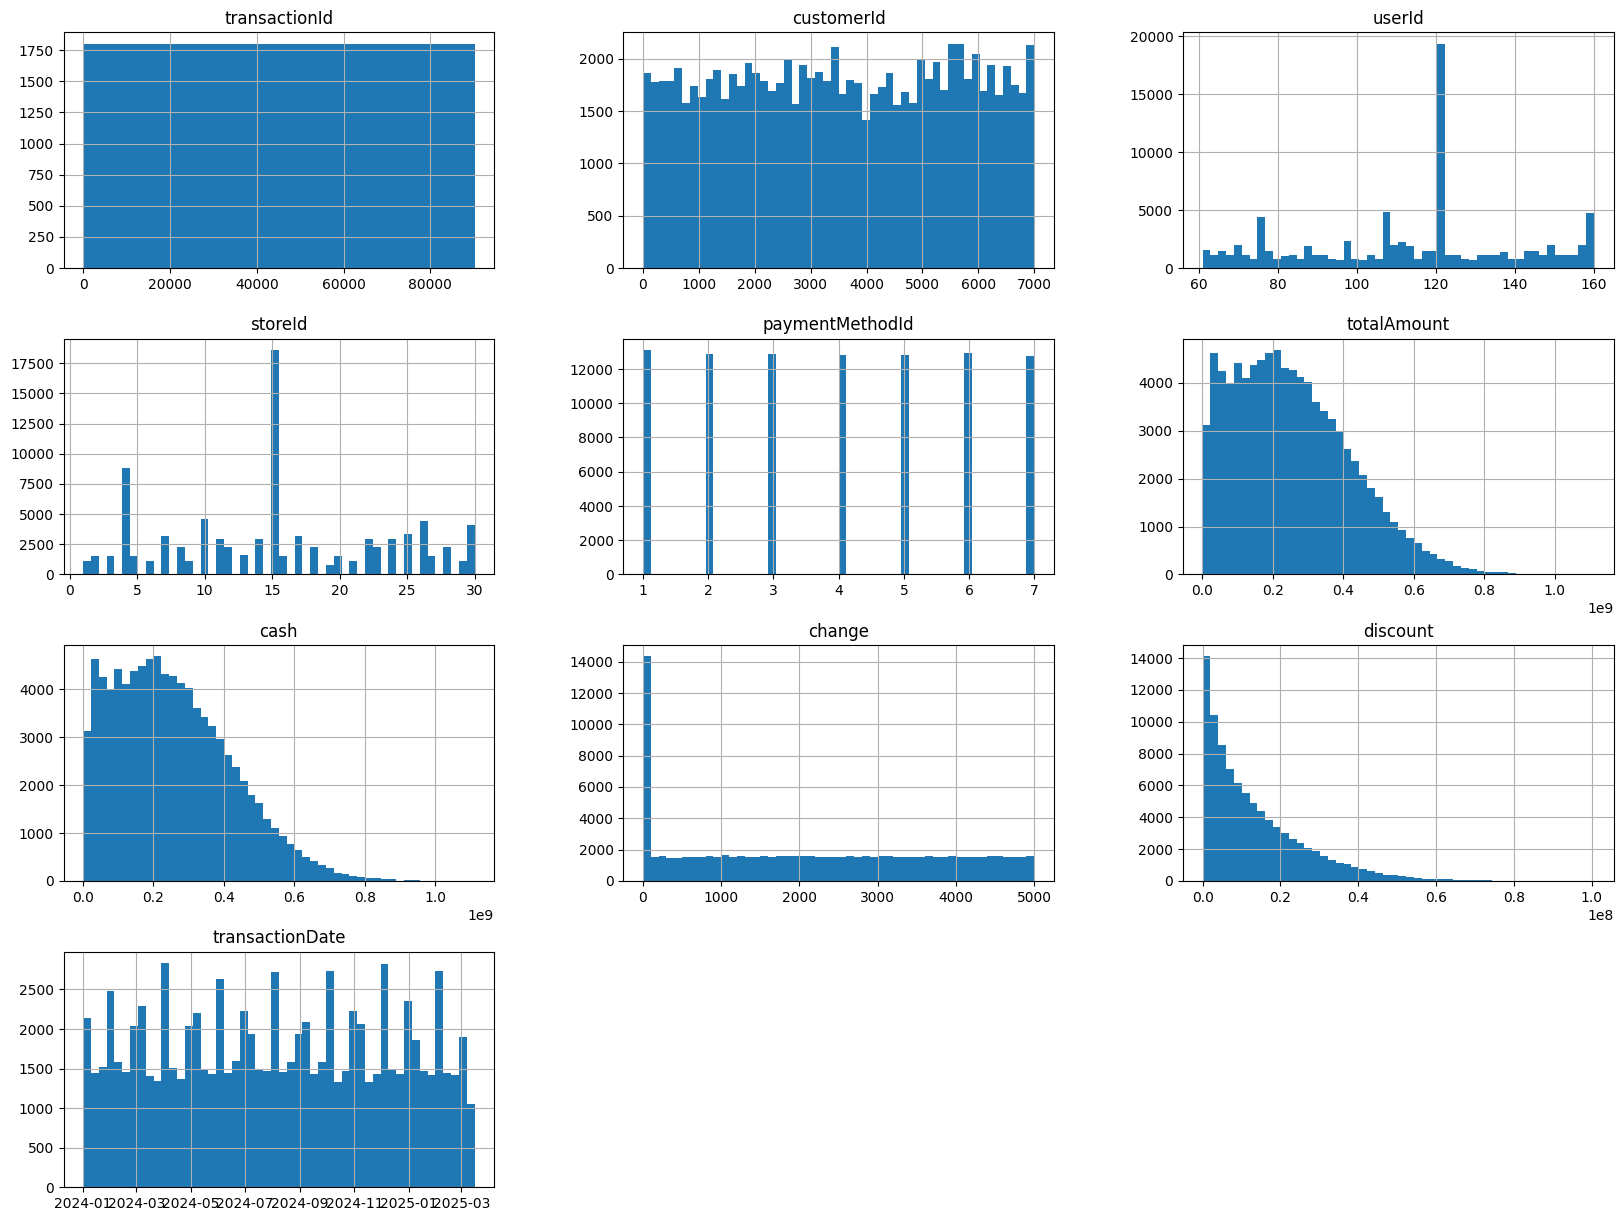

In [178]:
transactions_df.hist(bins=50, figsize=(20,15))
plt.show()

In [179]:
transaction_details_df

,transactionDetailId,transactionId,productId,variantId,quantity,subtotal
0,1,1,1,1,3,85195611
1,2,1,6,6,5,239914140
2,3,1,7,7,4,179535312
3,4,1,3,3,5,242152685
4,5,2,8,8,4,160658184
...,...,...,...,...,...,...
270532,270533,90180,280,280,1,10865765
270533,270534,90181,279,279,2,97085202
270534,270535,90181,273,273,3,128695032
270535,270536,90182,277,277,5,56727510


In [180]:
transactions_df['userId'].value_counts()

,count
userId,
121,18600
108,4478
159,4357
76,4059
149,1641
...,...
67,352
152,349
91,345


### User Activity

In [181]:
actions = [
    'Login', 'Logout', 'Tambah Produk', 'Edit Produk', 'Checkout',
    'cancel order', 'update profile', 'Transaksi'
]

In [182]:
def generate_activity_users(store_users_df, num_records=100):
    activity_data = []

    for i in range(num_records):
        store_user = store_users_df.sample(n=1).iloc[0]
        user_id = store_user['userId']
        store_id = store_user['storeId']

        action = random.choice(actions)

        action_time = fake.date_time_between(start_date="-30d", end_date="now")

        activity_data.append({
            'userActivityId': i + 1,
            'userId': user_id,
            'storeId': store_id,
            'action': action,
            'actionTime': action_time
        })
    return activity_data

In [183]:
activity_data = generate_activity_users(store_users_df, num_records=100)
activity_df = pd.DataFrame(activity_data)
activity_df.to_csv('user_activity.csv', index=False)

### Store Bill

In [184]:
bills = [
    'listrik', 'air', 'pajak', 'es batu', 'hutang piutang', 'perawatan alat',
    'biaya sewa', 'ganti lampu', 'beli meja'
]

statuses = [
    'PAID', 'UNPAID'
]

def generate_store_bills(stores_data):
    store_bills_data = []
    store_bill_id = 1

    for store in stores_data:
        store_id = store['storeId']
        num_bills = random.randint(2, 5)

        for _ in range(num_bills):
            bill_name = random.choice(bills)
            status = random.choice(statuses)
            on_date = datetime.now() - timedelta(days=random.randint(0, 30))

            store_bills_data.append({
                'storeBillsId': store_bill_id,
                'storeId': store_id,
                'name': bill_name,
                'status': status,
                "onDate": on_date.strftime("%Y-%m-%d %H:%M:%S")
            })
            store_bill_id += 1
    return store_bills_data

In [185]:
store_bills_data = generate_store_bills(stores_data)
store_bills_df = pd.DataFrame(store_bills_data)
store_bills_df.to_csv('store_bills.csv', index=False)

In [186]:
store_bills_df

,storeBillsId,storeId,name,status,onDate
0,1,1,beli meja,PAID,2025-03-17 06:25:01
1,2,1,listrik,UNPAID,2025-03-08 06:25:01
2,3,1,beli meja,PAID,2025-03-05 06:25:01
3,4,2,listrik,UNPAID,2025-03-18 06:25:01
4,5,2,air,PAID,2025-03-24 06:25:01
...,...,...,...,...,...
96,97,29,perawatan alat,PAID,2025-03-20 06:25:01
97,98,29,hutang piutang,PAID,2025-03-15 06:25:01
98,99,30,hutang piutang,UNPAID,2025-03-15 06:25:01
99,100,30,air,UNPAID,2025-03-08 06:25:01


### Supplier

In [187]:
def generate_suppliers(num_supplier=50):
    suppliers_data = []
    supplier_id = 1

    for _ in range(num_supplier):
        suppliers_data.append({
            'supplierId': supplier_id,
            'name': fake.company(),
            'phoneNumber': fake.phone_number(),
            'email': fake.email(),
            'address': fake.address()
        })
        supplier_id += 1
    return suppliers_data

In [188]:
suppliers_data = generate_suppliers()
suppliers_df = pd.DataFrame(suppliers_data)
suppliers_df.to_csv('suppliers.csv', index=False)

In [189]:
suppliers_df

,supplierId,name,phoneNumber,email,address
0,1,Perum Wulandari Saptono,(0271) 180-6880,eluh67@example.com,"Jalan Sukabumi No. 027\nPayakumbuh, Sumatera S..."
1,2,UD Saputra Tbk,+62 (05) 717 8685,lutama@example.com,"Jl. Moch. Toha No. 91\nTasikmalaya, JA 08072"
2,3,UD Sitorus,+62 (652) 405-7159,hartana72@example.net,"Jalan Antapani Lama No. 62\nGorontalo, Kaliman..."
3,4,CV Nurdiyanti,+62 (17) 025-1584,jaiman81@example.com,"Jl. Gegerkalong Hilir No. 93\nTarakan, Sulawes..."
4,5,Perum Suwarno Kuswandari (Persero) Tbk,+62 (0347) 323 2765,yuliartitirta@example.net,"Gang Ahmad Yani No. 4\nCilegon, KT 45513"
5,6,CV Saefullah Habibi,+62 (0533) 833 2980,napitupulusabar@example.com,"Gang Peta No. 920\nSerang, LA 56664"
6,7,PD Wahyudin Nababan Tbk,084 505 4370,zardianto@example.org,"Gg. Suryakencana No. 161\nPadang, SN 81255"
7,8,PD Maheswara (Persero) Tbk,(029) 288-9511,nurainirahmi@example.org,"Jalan Sukabumi No. 2\nMalang, JT 32626"
8,9,Perum Narpati Tbk,+62 (0891) 517 9526,usmansimanjuntak@example.org,"Jalan Dipatiukur No. 77\nPekanbaru, SN 44685"
9,10,CV Purnawati Widodo,0884855859,rahmawatiestiono@example.org,"Gang S. Parman No. 18\nBanjarbaru, Kalimantan ..."


### Supplier Products

In [190]:
def generate_supplier_products(products_data, suppliers_data, num_entries=100):
    supplier_products_data = []
    supplier_product_id = 1

    # Konversi ke DataFrame jika belum
    products_df = pd.DataFrame(products_data)
    suppliers_df = pd.DataFrame(suppliers_data)

    # Pisahkan produk berdasarkan managedBy
    admin_scm_products = products_df[products_df['managedBy'] == 'ADMIN_SCM']
    super_scm_products = products_df[products_df['managedBy'] == 'SUPER_SCM']

    # Set untuk memastikan kombinasi supplierId dan productId unik
    unique_combinations = set()

    # 1. Generate untuk produk ADMIN_SCM
    # Produk ADMIN_SCM dikelola lokal, jadi supplier-nya bisa dari supplier lokal yang relevan dengan storeId
    for _, product in admin_scm_products.iterrows():
        product_id = product['productId']  # Mengikuti schema 'id' dari Product
        store_id = product['storeId']

        # Pilih 1-3 supplier secara acak, simulasi supplier lokal untuk store tertentu
        num_suppliers = random.randint(1, 3)
        selected_suppliers = suppliers_df.sample(n=min(num_suppliers, len(suppliers_df))).to_dict('records')

        for supplier in selected_suppliers:
            supplier_id = supplier['supplierId']  # Mengikuti 'id' dari Supplier
            combination = (supplier_id, product_id)

            if combination not in unique_combinations:
                supplier_products_data.append({
                    'supplierProductId': supplier_product_id,
                    'supplierId': supplier_id,
                    'productId': product_id
                })
                unique_combinations.add(combination)
                supplier_product_id += 1

    # 2. Generate untuk produk SUPER_SCM
    # Produk SUPER_SCM dikelola global, jadi supplier-nya dipilih dari subset "supplier besar/global"
    # Misalnya, kita anggap supplier dengan ID lebih kecil (1-10) adalah supplier global
    super_scm_suppliers = suppliers_df[suppliers_df['supplierId'] <= 10]  # Simulasi supplier global
    if super_scm_suppliers.empty:
        super_scm_suppliers = suppliers_df  # Fallback jika tidak ada supplier dengan ID kecil

    for _, product in super_scm_products.iterrows():
        product_id = product['productId']

        # Produk SUPER_SCM biasanya punya 1-2 supplier global
        num_suppliers = random.randint(1, 2)
        selected_suppliers = super_scm_suppliers.sample(n=min(num_suppliers, len(super_scm_suppliers))).to_dict('records')

        for supplier in selected_suppliers:
            supplier_id = supplier['supplierId']
            combination = (supplier_id, product_id)

            if combination not in unique_combinations:
                supplier_products_data.append({
                    'supplierProductId': supplier_product_id,
                    'supplierId': supplier_id,
                    'productId': product_id
                })
                unique_combinations.add(combination)
                supplier_product_id += 1

    # 3. Tambahkan entri tambahan jika kurang dari num_entries
    while len(supplier_products_data) < num_entries and len(unique_combinations) < len(suppliers_df) * len(products_df):
        supplier = suppliers_df.sample(n=1).iloc[0]
        product = products_df.sample(n=1).iloc[0]
        supplier_id = supplier['supplierId']
        product_id = product['productId']
        combination = (supplier_id, product_id)

        # Pastikan sesuai managedBy: ADMIN_SCM bisa random, SUPER_SCM dari global supplier
        if product['managedBy'] == 'SUPER_SCM' and supplier_id > 10:
            continue  # Skip jika supplier tidak termasuk global untuk SUPER_SCM

        if combination not in unique_combinations:
            supplier_products_data.append({
                'id': supplier_product_id,
                'supplierId': supplier_id,
                'productId': product_id
            })
            unique_combinations.add(combination)
            supplier_product_id += 1

    print(f"Generated {len(supplier_products_data)} supplier-product relationships")
    return supplier_products_data


In [191]:
supplier_products_data = generate_supplier_products(products_data, suppliers_data, num_entries=50)
supplier_products_df = pd.DataFrame(supplier_products_data)
supplier_products_df.to_csv('supplier_product.csv', index=False)

Generated 515 supplier-product relationships


In [192]:
supplier_products_df

,supplierProductId,supplierId,productId
0,1,19,3
1,2,16,3
2,3,15,3
3,4,10,4
4,5,19,4
...,...,...,...
510,511,7,274
511,512,4,274
512,513,8,281
513,514,10,281


### Purchase Orders, Purchase Order Items, Warehouse

In [193]:
food_and_beverage_categories = set(product_category_fnb_stores.values()) | \
                              set(product_category_minimarket_stores.values()) | \
                              set(product_category_baby_child_stores.values()) & {"Susu Formula", "Makanan Bayi"} | \
                              set(product_category_pharmacy_stores.values()) & {"Minuman Kesehatan"}

In [194]:
def generate_purchase_orders(suppliers_df, stores_df, products_df, transactions_df, transaction_details_df, start_date, end_date, store_ids=None):
    purchase_orders_data = []
    purchase_order_items_data = []
    warehouse_stocks_data = []
    purchase_order_id = 1
    purchase_order_item_id = 1
    warehouse_stock_id = 1

    # Konversi ke DataFrame jika belum
    suppliers_df = pd.DataFrame(suppliers_df)
    stores_df = pd.DataFrame(stores_df)
    products_df = pd.DataFrame(products_df)
    transactions_df = pd.DataFrame(transactions_df)
    transaction_details_df = pd.DataFrame(transaction_details_df)

    # Gabungkan products_df dengan categories_data untuk mendapatkan nama kategori
    categories_df = pd.DataFrame(generate_categories(category_mapping))
    products_df = products_df.merge(categories_df[['categoryId', 'name']], on='categoryId', how='left', suffixes=('', '_category'))

    # Filter stores_df jika store_ids diberikan
    if store_ids is not None:
        store_ids = [store_ids] if isinstance(store_ids, int) else store_ids
        stores_df = stores_df[stores_df['storeId'].isin(store_ids)]
        if stores_df.empty:
            print(f"Tidak ada toko dengan store_ids={store_ids}")
            return [], [], []

    # Gabungkan transaction_details_df dengan transactions_df
    merged_transactions_df = transaction_details_df.merge(
        transactions_df[['transactionId', 'storeId', 'transactionDate']],
        on='transactionId',
        how='left'
    )

    # Simulasi stok awal per produk per toko
    stock_levels = {store_id: {product_id: random.randint(20, 100) for product_id in products_df[products_df['storeId'] == store_id]['productId']}
                    for store_id in stores_df['storeId']}

    # Periode 2 minggu
    current_date = start_date
    two_weeks = timedelta(days=14)

    while current_date < end_date:
        period_start = current_date - two_weeks
        period_end = current_date
        period_transactions = merged_transactions_df[
            (merged_transactions_df['transactionDate'] >= period_start) &
            (merged_transactions_df['transactionDate'] < period_end)
        ]

        if period_transactions.empty:
            print(f"Tidak ada transaksi untuk periode {period_start} - {period_end}")
            current_date += two_weeks
            continue

        # Kelompokkan transaksi berdasarkan storeId dan productId
        transaction_summary = period_transactions.groupby(['storeId', 'productId']).agg({
            'quantity': 'sum'
        }).reset_index()

        for _, store in stores_df.iterrows():
            store_id = store['storeId']
            store_type_id = store['storeTypeId']

            store_transaction_summary = transaction_summary[transaction_summary['storeId'] == store_id]
            if store_transaction_summary.empty:
                continue

            # Tentukan minimum stok berdasarkan tipe toko
            min_stock_level = 50 if store_type_id in [10, 11] else 20
            reorder_point = min_stock_level * 1.5

            items_to_order = []
            for _, trans in store_transaction_summary.iterrows():
                product_id = trans['productId']
                total_sold = int(trans['quantity'])

                current_stock = stock_levels[store_id].get(product_id, 0) - total_sold
                stock_levels[store_id][product_id] = max(0, current_stock)

                if current_stock < reorder_point:
                    quantity_purchased = total_sold * random.randint(2, 3)
                    items_to_order.append((product_id, quantity_purchased))

            if not items_to_order:
                continue

            supplier = suppliers_df.sample(n=1).iloc[0]
            supplier_id = supplier['supplierId']
            total_amount = 0
            order_date = current_date + timedelta(days=random.randint(0, 3))

            purchase_orders_data.append({
                'purchaseOrderId': purchase_order_id,
                'supplierId': supplier_id,
                'storeId': store_id,
                'totalAmount': 0,
                'orderDate': order_date,
                'status': 'DELIVERED'
            })

            for product_id, quantity_purchased in items_to_order:
                product_row = products_df[products_df['productId'] == product_id].iloc[0]
                capital_price = product_row['basePrice']
                total_amount += quantity_purchased * capital_price

                # Tentukan apakah produk ini makanan/minuman berdasarkan kategori
                category_name = product_row['name_category']
                is_food_or_beverage = category_name in food_and_beverage_categories
                expired_date = order_date + timedelta(days=random.randint(180, 730)) if is_food_or_beverage else None

                purchase_order_items_data.append({
                    'purchaseOrderItemId': purchase_order_item_id,
                    'purchaseOrderId': purchase_order_id,
                    'productId': product_id,
                    'quantity': quantity_purchased,
                    'capitalPrice': capital_price,
                    'expiredDate': expired_date
                })

                stock_levels[store_id][product_id] += quantity_purchased
                stock_remaining = min(stock_levels[store_id][product_id], random.randint(50, 200))
                warehouse_stocks_data.append({
                    'id': warehouse_stock_id,
                    'productId': product_id,
                    'storeId': store_id,
                    'purchaseOrderId': purchase_order_id,
                    'stock': stock_remaining,
                    'supplierId': supplier_id
                })

                purchase_order_item_id += 1
                warehouse_stock_id += 1

            purchase_orders_data[-1]['totalAmount'] = total_amount
            print(f"Purchase Order {purchase_order_id} dibuat untuk storeId {store_id} dengan {len(items_to_order)} item")
            purchase_order_id += 1

        current_date += two_weeks

    return purchase_orders_data, purchase_order_items_data, warehouse_stocks_data

In [195]:
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 3, 19)

purchase_orders_data, purchase_order_items_data, warehouse_stocks_data = generate_purchase_orders(
    suppliers_df, stores_df, products_df, transactions_df, transaction_details_df, start_date, end_date
)

# Konversi ke DataFrame dan simpan ke CSV
purchase_orders_df = pd.DataFrame(purchase_orders_data)
purchase_order_items_df = pd.DataFrame(purchase_order_items_data)
warehouse_stocks_df = pd.DataFrame(warehouse_stocks_data)

purchase_orders_df.to_csv('purchase_orders.csv', index=False)
purchase_order_items_df.to_csv('purchase_order_items.csv', index=False)
warehouse_stocks_df.to_csv('warehouse_stocks.csv', index=False)

Tidak ada transaksi untuk periode 2023-12-18 00:00:00 - 2024-01-01 00:00:00
Purchase Order 1 dibuat untuk storeId 1 dengan 7 item
Purchase Order 2 dibuat untuk storeId 2 dengan 8 item
Purchase Order 3 dibuat untuk storeId 3 dengan 6 item
Purchase Order 4 dibuat untuk storeId 4 dengan 13 item
Purchase Order 5 dibuat untuk storeId 5 dengan 6 item
Purchase Order 6 dibuat untuk storeId 6 dengan 4 item
Purchase Order 7 dibuat untuk storeId 7 dengan 12 item
Purchase Order 8 dibuat untuk storeId 8 dengan 8 item
Purchase Order 9 dibuat untuk storeId 9 dengan 5 item
Purchase Order 10 dibuat untuk storeId 10 dengan 7 item
Purchase Order 11 dibuat untuk storeId 11 dengan 6 item
Purchase Order 12 dibuat untuk storeId 12 dengan 13 item
Purchase Order 13 dibuat untuk storeId 13 dengan 9 item
Purchase Order 14 dibuat untuk storeId 14 dengan 10 item
Purchase Order 15 dibuat untuk storeId 15 dengan 7 item
Purchase Order 16 dibuat untuk storeId 16 dengan 6 item
Purchase Order 17 dibuat untuk storeId 17 

In [196]:
purchase_orders_df

,purchaseOrderId,supplierId,storeId,totalAmount,orderDate,status
0,1,19,1,31128302000,2024-01-15,DELIVERED
1,2,8,2,40539015000,2024-01-17,DELIVERED
2,3,32,3,35812341000,2024-01-18,DELIVERED
3,4,26,4,160177294000,2024-01-15,DELIVERED
4,5,31,5,10513930000,2024-01-15,DELIVERED
...,...,...,...,...,...,...
873,874,8,26,29227578000,2025-03-12,DELIVERED
874,875,49,27,8725914000,2025-03-10,DELIVERED
875,876,12,28,24085680000,2025-03-12,DELIVERED
876,877,41,29,2299395000,2025-03-12,DELIVERED


In [197]:
purchase_order_items_df

,purchaseOrderItemId,purchaseOrderId,productId,quantity,capitalPrice,expiredDate
0,1,1,1,98,28385000,NaT
1,2,1,2,80,33302000,NaT
2,3,1,3,144,48417000,NaT
3,4,1,5,174,6532000,NaT
4,5,1,6,108,47936000,NaT
...,...,...,...,...,...,...
3157,3158,877,271,105,21899000,NaT
3158,3159,878,275,210,25332000,NaT
3159,3160,878,277,196,11328000,NaT
3160,3161,878,281,195,14170000,NaT


In [198]:
warehouse_stocks_df

,id,productId,storeId,purchaseOrderId,stock,supplierId
0,1,1,1,1,98,19
1,2,2,1,1,84,19
2,3,3,1,1,144,19
3,4,5,1,1,106,19
4,5,6,1,1,109,19
...,...,...,...,...,...,...
3157,3158,271,29,877,70,41
3158,3159,275,30,878,68,5
3159,3160,277,30,878,118,5
3160,3161,281,30,878,136,5


In [199]:
products_df.pop('storeId')
products_df.to_csv('products.csv', index=False)

In [200]:
products_df

,productId,productCode,serialNumber,categoryId,name,description,discount,basePrice,imageUrl,isActive,managedBy,createdAt,updatedAt
0,1,PRD-569184,NaN,54,Headset Eaque,Impedit ullam maxime sequi quos mollitia dolor...,0,28385000,https://picsum.photos/413/534,True,SUPER_SCM,2025-02-20T10:16:34.729683,2025-02-20T14:15:48.716979
1,2,PRD-717717,NaN,45,Kamera Sed,Excepturi accusamus sequi asperiores eius sit ...,0,33302000,https://picsum.photos/373/687,True,SUPER_SCM,2025-01-30T11:34:04.837416,2025-02-12T11:41:32.793477
2,3,PRD-862186,NaN,42,Smartphone At,Voluptatibus natus laborum aut assumenda quod ...,0,48417000,https://dummyimage.com/996x920,True,ADMIN_SCM,2025-02-12T20:18:24.083710,2025-01-27T08:36:48.899122
3,4,PRD-314752,NaN,54,Headset Tenetur,Quis enim nemo quos porro optio repellat iusto...,0,38339000,https://dummyimage.com/110x983,True,ADMIN_SCM,2025-03-22T20:29:02.114770,2025-01-28T10:01:57.315692
4,5,PRD-403090,246276.0,50,Charger Smartphone Quos,Perspiciatis earum at neque hic eaque totam ne...,0,6532000,https://placekitten.com/982/85,True,ADMIN_SCM,2025-01-13T11:14:46.691015,2025-01-31T19:16:54.661867
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,279,PRD-624861,475250.0,107,Alat Pancing Odit,Laboriosam quasi eius quae repudiandae explica...,0,48533000,https://picsum.photos/72/409,True,ADMIN_SCM,2025-01-07T09:48:23.604330,2025-01-21T00:54:34.500241
279,280,PRD-127495,NaN,107,Alat Pancing Atque,Doloremque voluptas earum corporis placeat min...,14,10855000,https://placekitten.com/845/406,True,ADMIN_SCM,2025-02-06T07:32:16.968139,2025-01-06T05:19:40.129607
280,281,PRD-599967,NaN,105,Mainan Anak Fugiat,Molestiae nobis perspiciatis commodi hic sit e...,0,14170000,https://dummyimage.com/650x359,True,SUPER_SCM,2025-01-12T01:02:26.333219,2025-03-14T13:21:36.154430
281,282,PRD-186330,NaN,110,Action Figure & Koleksi Hobi Qui,Ipsam quo dignissimos facilis reprehenderit ve...,12,34194000,https://picsum.photos/319/421,True,SUPER_SCM,2025-01-09T04:24:35.331481,2025-03-09T17:12:17.342104


In [201]:
!rm -rf sample_data/

In [202]:
!zip -r /content/all_files.zip /content/*

updating: content/categories.csv (deflated 44%)
updating: content/customers.csv (deflated 64%)
updating: content/payment_methods.csv (deflated 45%)
updating: content/products.csv (deflated 67%)
updating: content/purchase_order_items.csv (deflated 64%)
updating: content/purchase_orders.csv (deflated 74%)
updating: content/shifts.csv (deflated 87%)
updating: content/store_bills.csv (deflated 81%)
updating: content/stores.csv (deflated 62%)
updating: content/store_users.csv (deflated 52%)
updating: content/supplier_product.csv (deflated 59%)
updating: content/suppliers.csv (deflated 53%)
updating: content/tenants.csv (deflated 49%)
updating: content/transaction_details.csv (deflated 76%)
updating: content/transactions.csv (deflated 63%)
updating: content/user_activity.csv (deflated 62%)
updating: content/users.csv (deflated 49%)
updating: content/variant_options.csv (deflated 53%)
updating: content/variant_option_variants.csv (deflated 59%)
updating: content/variants.csv (deflated 71%)
up